In [1]:
import pandas as pd 
code_df = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13', header=0)[0]
code_df.종목코드 = code_df.종목코드.map('{:06d}'.format) 
# 종목코드가 6자리이기 때문에 6자리를 맞춰주기 위해 설정한다.\
code_df = code_df[['회사명', '종목코드']] 
# code_df에는 회사명, 종목코드의 컬럼만 사용한다. 즉 나머지 컬럼의 경우 사용할 필요가 없기 때문에 사용하지 않는다. 
code_df = code_df.rename(columns={'회사명': 'name', '종목코드': 'code'}) 
# 한글로된 컬럼명을 영어로 바꿔준다.  
code_df

name    code
0          BYC  001460
1       CJ CGV  079160
2       DB손해보험  005830
3      DGB금융지주  139130
4        DSR제강  069730
5         KB금융  105560
6      KC그린홀딩스  009440
7     KISCO홀딩스  001940
8      LS전선아시아  229640
9        MH에탄올  023150
10        NICE  034310
11      S&T홀딩스  036530
12       SK텔레콤  017670
13      STX중공업  071970
14        계양전기  012200
15     골든브릿지증권  001290
16        기업은행  024110
17       깨끗한나라  004540
18        남광토건  001260
19        남해화학  025860
20         다스코  058730
21       대구백화점  006370
22        대신증권  003540
23        대우건설  047040
24        대한제분  001130
25        대한항공  003490
26        대한해운  005880
27       대호에이엘  069460
28        덕양산업  024900
29         덴티움  145720
...        ...     ...
2164   한국테크놀로지  053590
2165     한라IMS  092460
2166     한양이엔지  045100
2167    현대아이비티  048410
2168      현진소재  053660
2169      화일약품  061250
2170     효성오앤비  097870
2171       휴맥스  115160
2172      휴메딕스  200670
2173        힘스  238490
2174      라온테크  232680
2175      럭스피아  092590
2176       미애부  225850
2177   바이오시네틱스  281310
2178     바이오코아  216400
2179        볼빅  206950
2180   비플라이소프트  148780
2181       수젠텍  253840
2182       시큐센  232830
2183      에브리봇  270660
2184   에스알바이오텍  270210
2185  에스에이티이엔지  158300
2186      영현무역  242850
2187       이엠티  232530
2188      인터코스  240340
2189       제노텍  066830
2190  포인트엔지니어링  176560
2191   피엠디아카데미  144740
2192    한중엔시에스  107640
2193       휴벡셀  212310

[2194 rows x 2 columns]

In [15]:
code_df.to_csv('주식전체_금융.csv',encoding="cp949", mode="w",index=True)
# CSV파일로 먼저 한번 저장한다. 

In [3]:
def get_url(item_name, code_df):
    code = code_df.query("name=='{}'".format(item_name))['code'].to_string(index=False)
    url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code) 
# 종목 이름을 입력하면 종목에 해당하는 코드를 불러온다.
# 네이버 금융(http://finance.naver.com)에 해당 코드를 입력한다. 
    print("요청 URL = {}".format(url)) 
    return url
# 해당 코드에 맞는 주식에 대한 정보를 네이버에서 불러온다. 
# Url을 출력해준다. 

item_name='KB금융' 
# KB금융
# 대우건설
# 대한항공
# 이마트
# 오뚜기 
# 포스코
# 삼성전자
# LG유플러스
# NAVER
# SBS
# 해당하는 기업들의 이름을 넣는다.
url = get_url(item_name, code_df) # url에는 기업이름과 코드 번호를 얻는다. 
KB_bank = pd.DataFrame() # 일자 데이터를 담을 df라는 DataFrame를 생성한다.
for page in range(1, 11):  
    pg_url = '{url}&page={page}'.format(url=url, page=page)
    KB_bank = KB_bank.append(pd.read_html(pg_url, header=0)[0], ignore_index=True)
# 1페이지에서 11페이지의 데이터만 가져온다. 즉 2018년 1원 근처부터 현재까지 불러온다. 
# 해당 기업의 url에 맞는 정보를 DataFrame에 추가한다. 
    
# df.dropna()를 이용해 결측값 있는 행 제거
KB_bank = KB_bank.dropna() 
# nan값을 드랍한다. 
KB_bank


요청 URL = http://finance.naver.com/item/sise_day.nhn?code=105560


날짜     종가   전일비     시가     고가     저가      거래량
0   2018.05.21  55900   500  56100  56500  55300   932790
1   2018.05.18  56400  1200  57400  57600  56000   945596
2   2018.05.17  57600     0  57700  58100  57500   709917
3   2018.05.16  57600   300  57700  57800  57200   637333
4   2018.05.15  57300   900  58200  58300  57100   963720
5   2018.05.14  58200     0  58000  58700  58000   593203
6   2018.05.11  58200   200  58000  58500  57800   544837
7   2018.05.10  58000   200  58100  59300  58000   945925
8   2018.05.09  58200   200  57900  58500  57100  1254153
9   2018.05.08  58400   800  58300  59000  58100  1428139
10  2018.05.04  59200  1100  59700  59800  58600   884383
11  2018.05.03  60300   400  60800  61000  60000   475709
12  2018.05.02  60700   500  60800  61200  60300   774626
13  2018.04.30  61200  1300  60300  61400  60200   596697
14  2018.04.27  59900   200  60000  61400  59800  1002918
15  2018.04.26  60100   400  61100  61100  60100   951919
16  2018.04.25  60500   800  61400  61400  60100   780012
17  2018.04.24  61300   500  61000  61600  60200   738714
18  2018.04.23  60800   300  60100  61000  59400   932627
19  2018.04.20  60500   500  60700  61300  59900  1024315
20  2018.04.19  60000  1100  59300  60300  59200  1034416
21  2018.04.18  58900   100  58500  59300  58200   904335
22  2018.04.17  59000   800  60600  60800  58900   702464
23  2018.04.16  59800   100  59900  60300  58900   449026
24  2018.04.13  59900   700  59400  60600  59300  1002416
25  2018.04.12  59200   700  58700  59800  58600   749071
26  2018.04.11  58500   100  58100  58900  57700   797376
27  2018.04.10  58600  2000  56600  59000  56100  1470332
28  2018.04.09  56600  1700  57400  58000  56200  1295227
29  2018.04.06  58300   200  58300  58900  57900   801611
..         ...    ...   ...    ...    ...    ...      ...
70  2018.02.05  67700  1300  67000  68000  66200  1414389
71  2018.02.02  66400   300  66100  66900  65300   998113
72  2018.02.01  66100  1200  66000  67000  65800   914632
73  2018.01.31  67300   400  66400  67500  64600  1206737
74  2018.01.30  66900   300  67000  67700  66600   911296
75  2018.01.29  67200   200  67900  68300  67000   784099
76  2018.01.26  67400   800  66300  67500  66000   933977
77  2018.01.25  66600   900  67100  67900  66500   836419
78  2018.01.24  67500  1100  68000  68500  67300   724918
79  2018.01.23  68600  2900  65900  68600  65900   899249
80  2018.01.22  65700  1400  68000  68400  65700   917484
81  2018.01.19  67100  1400  66100  67800  66100  1002996
82  2018.01.18  65700   300  66200  67100  65500   860775
83  2018.01.17  65400   400  66000  66600  65300  1370204
84  2018.01.16  65800  1800  67600  67900  65800   992214
85  2018.01.15  67600   100  67900  68900  67400   740957
86  2018.01.12  67700     0  69200  69200  67500   926019
87  2018.01.11  67700  1700  67600  68100  66600  1035915
88  2018.01.10  66000  1200  67000  68100  66000   899922
89  2018.01.09  67200   600  67400  67900  66400   943705
90  2018.01.08  66600  2500  64500  67100  64300  1044425
91  2018.01.05  64100  1100  63000  64400  63000   718208
92  2018.01.04  63000   100  63400  63900  62800   674521
93  2018.01.03  63100     0  62100  63500  62100   684227
94  2018.01.02  63100   300  63900  63900  62400   576658
95  2017.12.28  63400   400  63600  63600  62500   617834
96  2017.12.27  63000   800  62100  63100  61400   720168
97  2017.12.26  63800  1500  63000  64000  62400   926002
98  2017.12.22  62300   400  62600  63300  62300   667299
99  2017.12.21  61900   900  62900  63500  61800  1016727

[100 rows x 7 columns]

In [4]:
# 대우건설의 코드와 item_name 제외하고 동일
def get_url(item_name, code_df):
    code = code_df.query("name=='{}'".format(item_name))['code'].to_string(index=False)
    url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code) 
    
    print("요청 URL = {}".format(url)) 
    return url

item_name='대우건설' 
# KB금융
# 대우건설
# 대한항공
# 이마트
# 오뚜기 
# 포스코
# 삼성전자
# LG유플러스
# NAVER
# SBS
url = get_url(item_name, code_df)
DU_s = pd.DataFrame()
for page in range(1, 11): 
    pg_url = '{url}&page={page}'.format(url=url, page=page)
    DU_s = DU_s.append(pd.read_html(pg_url, header=0)[0], ignore_index=True)
    

DU_s = DU_s.dropna() 

DU_s


요청 URL = http://finance.naver.com/item/sise_day.nhn?code=047040


날짜    종가  전일비    시가    고가    저가       거래량
0   2018.05.21  6730  350  7080  7100  6720   3905221
1   2018.05.18  7080  130  6960  7090  6830   2292875
2   2018.05.17  6950   80  6900  7200  6800   5121141
3   2018.05.16  6870  140  6660  6970  6600   6464378
4   2018.05.15  7010   90  6980  7100  6820   5272597
5   2018.05.14  6920  490  6530  6970  6500   9223127
6   2018.05.11  6430   60  6550  6550  6380   2008335
7   2018.05.10  6490  160  6440  6570  6380   2927708
8   2018.05.09  6330    0  6340  6380  6100   2365892
9   2018.05.08  6330  280  6560  6640  6310   4274532
10  2018.05.04  6610  220  6380  6630  6350   6168356
11  2018.05.03  6390   40  6450  6560  6300   2871082
12  2018.05.02  6430   80  6490  6640  6180   9272007
13  2018.04.30  6350  400  6100  6600  6060   9798465
14  2018.04.27  5950   10  6030  6180  5910   3412371
15  2018.04.26  5940  150  6170  6200  5870   3842524
16  2018.04.25  6090  130  6200  6250  6010   2127734
17  2018.04.24  6220  130  6150  6310  6020   3073043
18  2018.04.23  6090  190  6520  6520  5990   4751948
19  2018.04.20  6280   40  6370  6370  6100   2994387
20  2018.04.19  6320  330  6090  6340  6080   7978654
21  2018.04.18  5990  310  5700  6020  5680   4398386
22  2018.04.17  5680  110  5540  5720  5540   1820893
23  2018.04.16  5570   60  5510  5610  5450    906457
24  2018.04.13  5510   50  5560  5570  5480    727733
25  2018.04.12  5560   70  5490  5630  5470   1553738
26  2018.04.11  5490   20  5510  5570  5440   1069489
27  2018.04.10  5510   70  5540  5620  5460   1366020
28  2018.04.09  5580  260  5470  5670  5430   4703256
29  2018.04.06  5320  110  5220  5350  5180   1290105
..         ...   ...  ...   ...   ...   ...       ...
70  2018.02.05  6020  120  6080  6110  5970   3109158
71  2018.02.02  6140   50  6070  6160  6050   2462207
72  2018.02.01  6090  110  6230  6230  6000   3782960
73  2018.01.31  6200   60  6210  6260  6040   4121329
74  2018.01.30  6140   40  6180  6280  6120   2814616
75  2018.01.29  6180  110  6120  6290  6090   5640428
76  2018.01.26  6070    0  6080  6170  5980   4676623
77  2018.01.25  6070  170  5950  6090  5920   3853132
78  2018.01.24  5900  110  6050  6060  5880   1873962
79  2018.01.23  6010  110  5940  6040  5900   3097667
80  2018.01.22  5900   60  5930  5970  5760   2588411
81  2018.01.19  5960  230  5760  6020  5740   4679922
82  2018.01.18  5730   90  5820  5880  5700   2020250
83  2018.01.17  5820   60  5810  5840  5710   2268412
84  2018.01.16  5760   90  5820  5830  5720   1412316
85  2018.01.15  5850   20  5860  5870  5730   2250536
86  2018.01.12  5870   30  5900  6000  5810   3199318
87  2018.01.11  5900  180  6120  6150  5900  23827071
88  2018.01.10  6080   40  6030  6230  6010   2837827
89  2018.01.09  6040   90  6130  6170  6000   1887226
90  2018.01.08  6130   10  6140  6260  6060   1955425
91  2018.01.05  6140   10  6190  6220  6050   1883209
92  2018.01.04  6150  200  6040  6200  5980   2916714
93  2018.01.03  5950   60  5910  6030  5890   1797670
94  2018.01.02  5890   30  5840  5950  5830    837530
95  2017.12.28  5920   70  5860  6050  5840   1575691
96  2017.12.27  5850   10  5880  5920  5710   1475195
97  2017.12.26  5860  120  5810  5940  5800   1466221
98  2017.12.22  5740   50  5810  5850  5730   1022871
99  2017.12.21  5790   40  5790  5830  5690   1147606

[100 rows x 7 columns]

In [5]:
# 대우건설의 코드와 item_name 제외하고 동일
def get_url(item_name, code_df):
    code = code_df.query("name=='{}'".format(item_name))['code'].to_string(index=False)
    url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code) 
    
    print("요청 URL = {}".format(url)) 
    return url


item_name='대한항공' 
# KB금융
# 대우건설
# 대한항공
# 이마트
# 오뚜기 
# 포스코
# 삼성전자
# LG유플러스
# NAVER
# SBS
# 해당하는 기업들의 이름을 넣는다.
url = get_url(item_name, code_df) 
Korea_A = pd.DataFrame()
for page in range(1, 11): 
    pg_url = '{url}&page={page}'.format(url=url, page=page)
    Korea_A = Korea_A.append(pd.read_html(pg_url, header=0)[0], ignore_index=True)
    
Korea_A = Korea_A.dropna() 
Korea_A


요청 URL = http://finance.naver.com/item/sise_day.nhn?code=003490


날짜     종가   전일비     시가     고가     저가      거래량
0   2018.05.21  32250   100  32250  32400  31800   315130
1   2018.05.18  32350   400  32550  32900  32100   603390
2   2018.05.17  32750   950  33600  33600  32450   893468
3   2018.05.16  33700   450  33900  34000  33250   539136
4   2018.05.15  34150   350  34500  34600  33900   326214
5   2018.05.14  34500   400  34200  34850  34150   481184
6   2018.05.11  34100  1150  33150  34400  33100   703071
7   2018.05.10  32950   500  33250  33450  32850   782726
8   2018.05.09  33450   100  33200  33850  32200   850912
9   2018.05.08  33350   800  34500  34550  33200   754231
10  2018.05.04  34150   700  33450  34750  33250   789532
11  2018.05.03  33450   500  34000  34050  33400   356347
12  2018.05.02  33950   200  34250  34350  33600   429287
13  2018.04.30  34150   250  33800  34400  33600   535569
14  2018.04.27  33900   150  33750  34350  33650   556401
15  2018.04.26  33750   700  34450  34700  33300   772345
16  2018.04.25  34450   200  34050  34800  33800   728031
17  2018.04.24  34250     0  34150  34500  33650   692289
18  2018.04.23  34250   900  33500  34350  32800   971761
19  2018.04.20  33350    50  33100  33600  32700   425452
20  2018.04.19  33400  1000  34000  34050  33000  1002289
21  2018.04.18  34400   700  33700  34600  33700   711301
22  2018.04.17  33700   600  33300  33900  33150   838114
23  2018.04.16  33100   850  33550  33600  32600  1600474
24  2018.04.13  33950   400  33650  34200  33450   689072
25  2018.04.12  33550  2350  35650  35750  33350  1340498
26  2018.04.11  35900    50  35850  36100  35450   351539
27  2018.04.10  35950   500  35300  36000  34900   602388
28  2018.04.09  35450   100  35150  35850  34900   475510
29  2018.04.06  35550     0  35450  36150  35100   420441
..         ...    ...   ...    ...    ...    ...      ...
70  2018.02.05  36050  1400  36750  36800  35600   865010
71  2018.02.02  37450   900  38000  38350  37200   580167
72  2018.02.01  38350   200  38450  38800  37850   401909
73  2018.01.31  38550   750  37450  38550  37300   524647
74  2018.01.30  37800   550  38400  38800  37600   563361
75  2018.01.29  38350   200  38850  39500  38250   769458
76  2018.01.26  38550   550  37900  38700  37800   642255
77  2018.01.25  38000   150  38050  38250  37550   647240
78  2018.01.24  37850  1450  36400  38000  36200   899844
79  2018.01.23  36400    50  36300  36950  36250   451533
80  2018.01.22  36350   650  37100  37250  35800   592419
81  2018.01.19  37000   350  36700  37500  36550   481361
82  2018.01.18  36650   800  37650  37700  36250   701894
83  2018.01.17  37450   100  37400  37550  36550   533348
84  2018.01.16  37350   250  37850  38150  37200   519667
85  2018.01.15  37600   850  36750  37850  36500   939552
86  2018.01.12  36750   800  35950  37000  35900   695593
87  2018.01.11  35950   200  35700  36250  35450   769974
88  2018.01.10  35750   550  36000  36150  35600   590370
89  2018.01.09  36300   200  36000  36850  35650   583993
90  2018.01.08  36100  1200  35100  36150  35100   841491
91  2018.01.05  34900     0  35250  35250  34450   489822
92  2018.01.04  34900   850  35500  35950  34900   571308
93  2018.01.03  35750   150  35950  36150  35550   497403
94  2018.01.02  35900  2050  34100  36100  34100  1360084
95  2017.12.28  33850   400  33500  34050  33250   405858
96  2017.12.27  33450    50  33300  33750  33000   394608
97  2017.12.26  33500   350  33100  33700  32900   517429
98  2017.12.22  33150   300  32900  33300  32650   353054
99  2017.12.21  32850  1000  33850  33850  32850   691072

[100 rows x 7 columns]

In [6]:
# 대우건설의 코드와 item_name 제외하고 동일
def get_url(item_name, code_df):
    code = code_df.query("name=='{}'".format(item_name))['code'].to_string(index=False)
    url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code) 
    
    print("요청 URL = {}".format(url)) 
    return url

item_name='이마트' 
# 이마트
# 오뚜기 
# 포스코
# 삼성전자
# LG유플러스
# NAVER
# SBS

url = get_url(item_name, code_df)
E_mart = pd.DataFrame()  
for page in range(1, 11): 
    pg_url = '{url}&page={page}'.format(url=url, page=page)
    E_mart = E_mart.append(pd.read_html(pg_url, header=0)[0], ignore_index=True)
    

E_mart = E_mart.dropna() 
E_mart


요청 URL = http://finance.naver.com/item/sise_day.nhn?code=139480


날짜      종가    전일비      시가      고가      저가     거래량
0   2018.05.21  277000   5500  271500  279500  271500  126696
1   2018.05.18  271500  12000  260000  272500  260000  140670
2   2018.05.17  259500    500  259000  266500  258500   59846
3   2018.05.16  259000   2500  259500  260000  254500   80294
4   2018.05.15  261500   6500  265500  266000  261500   46160
5   2018.05.14  268000   7000  262000  269000  262000   67188
6   2018.05.11  261000   9000  266500  270500  258000  155232
7   2018.05.10  270000  13000  255500  271500  255500  147645
8   2018.05.09  257000   4500  260000  263000  256000   63130
9   2018.05.08  261500   4000  264500  266500  259000   83937
10  2018.05.04  265500   1000  263500  270500  263500   56841
11  2018.05.03  264500   7000  270000  271500  263000   73788
12  2018.05.02  271500   1500  271000  272500  266500   45198
13  2018.04.30  270000   5500  267000  272500  266000   53984
14  2018.04.27  264500   4000  266500  270000  264000   52785
15  2018.04.26  268500    500  269000  271000  266500   46129
16  2018.04.25  269000   1000  271500  271500  263500   47212
17  2018.04.24  270000   3500  268000  274500  268000   80276
18  2018.04.23  266500    500  265500  268500  263500   65134
19  2018.04.20  267000   1000  267000  268000  262000   96518
20  2018.04.19  268000   6000  273000  275000  267500   95912
21  2018.04.18  274000   1000  272500  276000  271000   54643
22  2018.04.17  273000   5000  276500  278500  272000   46923
23  2018.04.16  278000   2000  280000  281500  276000   34578
24  2018.04.13  280000   3500  275000  281500  275000   56282
25  2018.04.12  276500   4500  280000  281000  273000  102251
26  2018.04.11  281000   9500  286500  288000  281000   94912
27  2018.04.10  290500   2500  285500  292000  283000   62953
28  2018.04.09  288000    500  290500  290500  283500   60069
29  2018.04.06  287500   4000  283500  288000  279000   75373
..         ...     ...    ...     ...     ...     ...     ...
70  2018.02.05  284000   5000  289000  289000  282500   55264
71  2018.02.02  289000   2500  291000  292500  285000   79557
72  2018.02.01  291500    500  288500  295500  286000  111459
73  2018.01.31  291000   5000  300000  301500  287500  131660
74  2018.01.30  296000   3000  300000  302500  292000   94717
75  2018.01.29  299000   4500  305500  311000  294500  222747
76  2018.01.26  294500  38500  255000  297000  255000  515536
77  2018.01.25  256000   3500  259000  259500  254000  133420
78  2018.01.24  259500   2000  260500  262000  259500   69112
79  2018.01.23  261500   2500  262500  264500  259500   79048
80  2018.01.22  264000   2000  265000  266000  259000   73601
81  2018.01.19  266000   5500  261000  266000  260500   68670
82  2018.01.18  260500      0  260500  264000  259000   72523
83  2018.01.17  260500   2000  258000  266500  258000  120347
84  2018.01.16  258500   4500  262000  265000  257000  107372
85  2018.01.15  263000   6000  269500  271500  262000   70057
86  2018.01.12  269000   7000  273500  279500  268500   86650
87  2018.01.11  276000   2500  280000  280000  268500   93438
88  2018.01.10  278500   3500  273000  279500  273000   58278
89  2018.01.09  275000   3500  268000  275500  266000   66331
90  2018.01.08  271500  12500  260000  273500  259000   81519
91  2018.01.05  259000      0  260000  260500  256000   58026
92  2018.01.04  259000   1000  264000  264500  255000   78635
93  2018.01.03  260000   2000  255000  263000  255000   63619
94  2018.01.02  262000   9000  272000  273000  260500   62482
95  2017.12.28  271000   3000  265500  271000  264500   46093
96  2017.12.27  268000   1000  263500  270500  260000   40467
97  2017.12.26  267000   3000  270500  274500  264500   52600
98  2017.12.22  270000   3000  275000  275000  267500   49432
99  2017.12.21  273000   1000  268500  276000  264500   74445

[100 rows x 7 columns]

In [7]:
# 대우건설의 코드와 item_name 제외하고 동일
def get_url(item_name, code_df):
    code = code_df.query("name=='{}'".format(item_name))['code'].to_string(index=False)
    url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code) 
    
    print("요청 URL = {}".format(url)) 
    return url
# 해당 코드에 맞는 주식에 대한 정보를 네이버에서 불러오고 
# Url을 출력해준다. 

item_name='오뚜기' 
# 오뚜기 
# 포스코
# 삼성전자
# LG유플러스
# NAVER
# SBS

url = get_url(item_name, code_df) 
O_food = pd.DataFrame()  
for page in range(1, 11):
    pg_url = '{url}&page={page}'.format(url=url, page=page)
    O_food = O_food.append(pd.read_html(pg_url, header=0)[0], ignore_index=True)
    

O_food = O_food.dropna() 
O_food


요청 URL = http://finance.naver.com/item/sise_day.nhn?code=007310


날짜      종가    전일비      시가      고가      저가    거래량
0   2018.05.21  783000   1000  780000  788000  776000   3002
1   2018.05.18  784000   7000  776000  792000  771000   4761
2   2018.05.17  777000   7000  787000  787000  768000   3971
3   2018.05.16  784000  37000  750000  785000  746000   7726
4   2018.05.15  747000   1000  746000  753000  731000   4527
5   2018.05.14  746000   5000  746000  755000  742000   3040
6   2018.05.11  741000   2000  742000  746000  735000   4397
7   2018.05.10  739000   7000  742000  749000  730000   5398
8   2018.05.09  746000   2000  748000  757000  745000   3164
9   2018.05.08  748000  13000  759000  767000  741000   3604
10  2018.05.04  761000  10000  765000  770000  759000   3622
11  2018.05.03  771000  10000  782000  785000  771000   2563
12  2018.05.02  781000  13000  791000  799000  780000   4077
13  2018.04.30  794000  23000  780000  795000  771000   4334
14  2018.04.27  771000      0  771000  779000  766000   2510
15  2018.04.26  771000   1000  773000  775000  762000   3119
16  2018.04.25  772000  14000  788000  788000  771000   3002
17  2018.04.24  786000      0  787000  791000  778000   4250
18  2018.04.23  786000   4000  775000  789000  767000   4319
19  2018.04.20  782000   7000  773000  783000  773000   2257
20  2018.04.19  775000   4000  778000  785000  769000   3831
21  2018.04.18  779000  11000  787000  793000  775000   3535
22  2018.04.17  790000   9000  780000  790000  777000   5105
23  2018.04.16  781000  20000  768000  786000  764000   6532
24  2018.04.13  761000  11000  764000  770000  750000   3271
25  2018.04.12  772000   2000  780000  780000  770000   2031
26  2018.04.11  774000   4000  770000  778000  768000   3783
27  2018.04.10  778000   4000  768000  782000  766000   4596
28  2018.04.09  774000   9000  762000  775000  762000   4121
29  2018.04.06  765000   1000  762000  770000  755000   3474
..         ...     ...    ...     ...     ...     ...    ...
70  2018.02.05  730000  29000  753000  757000  727000  11918
71  2018.02.02  759000  10000  769000  776000  753000   6662
72  2018.02.01  769000   1000  768000  776000  767000   4917
73  2018.01.31  770000  10000  777000  781000  756000  10050
74  2018.01.30  780000  11000  794000  800000  778000   6416
75  2018.01.29  791000   5000  801000  803000  790000   6572
76  2018.01.26  796000  11000  786000  803000  786000   8225
77  2018.01.25  785000   1000  787000  787000  781000   3402
78  2018.01.24  784000   5000  779000  786000  777000   3150
79  2018.01.23  779000   5000  782000  786000  777000   5013
80  2018.01.22  784000   5000  779000  787000  777000   2169
81  2018.01.19  779000   4000  775000  785000  775000   2792
82  2018.01.18  775000   3000  778000  784000  775000   2659
83  2018.01.17  778000  13000  787000  791000  777000   3328
84  2018.01.16  791000  13000  783000  793000  779000   2994
85  2018.01.15  778000      0  776000  785000  776000   3082
86  2018.01.12  778000   5000  791000  791000  777000   4149
87  2018.01.11  783000  13000  791000  796000  781000   5328
88  2018.01.10  796000   8000  789000  798000  788000   3719
89  2018.01.09  788000   4000  790000  797000  782000   3522
90  2018.01.08  792000      0  795000  797000  781000   3365
91  2018.01.05  792000   8000  783000  793000  775000   4884
92  2018.01.04  784000  16000  801000  805000  782000   5273
93  2018.01.03  800000   7000  794000  806000  794000   3843
94  2018.01.02  807000   1000  806000  811000  793000   3863
95  2017.12.28  806000   6000  802000  809000  796000   2988
96  2017.12.27  800000   2000  793000  802000  787000   3034
97  2017.12.26  802000   4000  798000  811000  798000   3527
98  2017.12.22  798000  10000  787000  799000  786000   2471
99  2017.12.21  788000  29000  811000  812000  781000   5931

[100 rows x 7 columns]

In [8]:
# 대우건설의 코드와 item_name 제외하고 동일
def get_url(item_name, code_df):
    code = code_df.query("name=='{}'".format(item_name))['code'].to_string(index=False)
    url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code) 
    
    print("요청 URL = {}".format(url)) 
    return url

item_name='포스코' 
# 포스코
# 삼성전자
# LG유플러스
# NAVER
# SBS

url = get_url(item_name, code_df)
pos = pd.DataFrame()  
for page in range(1, 11): 
    pg_url = '{url}&page={page}'.format(url=url, page=page)
    pos = pos.append(pd.read_html(pg_url, header=0)[0], ignore_index=True)
    

pos = pos.dropna() 

pos


요청 URL = http://finance.naver.com/item/sise_day.nhn?code=005490


날짜      종가    전일비      시가      고가      저가     거래량
0   2018.05.21  361000    500  359500  366000  356000  184989
1   2018.05.18  360500    500  359000  365000  358000  166030
2   2018.05.17  360000   3000  368500  371500  359000  177278
3   2018.05.16  363000   7500  360000  370000  359000  157874
4   2018.05.15  370500    500  373500  376000  366000  215779
5   2018.05.14  371000  13000  363000  372000  360000  229020
6   2018.05.11  358000   1500  358500  366500  357500  150948
7   2018.05.10  359500   9000  353000  360000  350000  224085
8   2018.05.09  350500   8500  359000  359500  350500  196712
9   2018.05.08  359000   8500  361500  365000  358000  248820
10  2018.05.04  367500   7000  356000  371500  353500  210619
11  2018.05.03  360500  12000  379000  380000  359500  209702
12  2018.05.02  372500      0  371000  380500  363000  310219
13  2018.04.30  372500  21500  359500  378500  357000  357719
14  2018.04.27  351000   7500  358500  360000  350500  239939
15  2018.04.26  358500    500  359000  363000  355500  190113
16  2018.04.25  359000   5000  357500  359000  352500  219208
17  2018.04.24  354000   4000  354000  357500  350000  175757
18  2018.04.23  350000    500  350000  357000  347000  182375
19  2018.04.20  349500   5500  354500  355000  345000  157262
20  2018.04.19  355000   5500  355000  359500  349000  310011
21  2018.04.18  349500  16500  332000  349500  329000  461637
22  2018.04.17  333000   8000  322500  333000  322500  220848
23  2018.04.16  325000   2500  330000  332000  321500  135924
24  2018.04.13  327500   6000  325000  332500  324500  209612
25  2018.04.12  321500   5000  326000  327500  319000  279808
26  2018.04.11  326500   2000  329000  333500  324500  258804
27  2018.04.10  324500  11500  312000  325000  310000  387151
28  2018.04.09  313000   6000  317500  317500  310000  286966
29  2018.04.06  319000    500  319000  323500  316500  273644
..         ...     ...    ...     ...     ...     ...     ...
70  2018.02.05  381500   2000  378000  383000  374500  206251
71  2018.02.02  383500  11500  390000  390500  381000  227378
72  2018.02.01  395000  14500  385000  400000  381500  334689
73  2018.01.31  380500   1000  380000  385500  370500  250773
74  2018.01.30  379500  12500  388000  393500  379500  270903
75  2018.01.29  392000   3000  395000  397500  390000  166584
76  2018.01.26  395000   3000  393000  396000  387500  194814
77  2018.01.25  392000   5000  387000  394000  376500  274674
78  2018.01.24  387000   7000  380000  387000  378000  190705
79  2018.01.23  380000   2500  377500  382000  376000  174829
80  2018.01.22  377500   8000  385000  386000  368000  249860
81  2018.01.19  385500    500  385000  395500  384000  227900
82  2018.01.18  385000    500  385500  388500  379500  211404
83  2018.01.17  385500   7500  376000  386000  375500  230473
84  2018.01.16  378000   2500  379500  383500  376000  173673
85  2018.01.15  380500   6000  387000  387500  377500  186265
86  2018.01.12  386500  20000  373500  389500  373000  295131
87  2018.01.11  366500   6000  369000  371500  363000  210191
88  2018.01.10  372500   5000  375000  383000  370000  208474
89  2018.01.09  377500   8000  372500  377500  371500  229700
90  2018.01.08  369500   1500  370000  374000  363500  206165
91  2018.01.05  368000    500  369000  369500  365500  205202
92  2018.01.04  367500  10000  362000  370000  361000  416948
93  2018.01.03  357500  18500  347000  358500  346500  485812
94  2018.01.02  339000   6500  335000  341000  332500  153013
95  2017.12.28  332500   2000  335000  335000  329000  164553
96  2017.12.27  334500   5000  334500  339000  332000  143284
97  2017.12.26  339500   2500  338000  340000  335000  188453
98  2017.12.22  337000      0  337000  338000  333000  161337
99  2017.12.21  337000   3500  338500  341000  334500  264986

[100 rows x 7 columns]

In [9]:
# 대우건설의 코드와 item_name 제외하고 동일
def get_url(item_name, code_df):
    code = code_df.query("name=='{}'".format(item_name))['code'].to_string(index=False)
    url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code) 
    
    print("요청 URL = {}".format(url)) 
    return url

item_name='삼성전자' 
# 삼성전자
# LG유플러스
# NAVER
# SBS

url = get_url(item_name, code_df) 
SS = pd.DataFrame() #  
for page in range(1, 11): 
    pg_url = '{url}&page={page}'.format(url=url, page=page)
    SS = E_mart.append(pd.read_html(pg_url, header=0)[0], ignore_index=True)
    

SS = SS.dropna() 

SS


요청 URL = http://finance.naver.com/item/sise_day.nhn?code=005930


날짜       종가    전일비       시가       고가       저가     거래량
0    2018.05.21   277000   5500   271500   279500   271500  126696
1    2018.05.18   271500  12000   260000   272500   260000  140670
2    2018.05.17   259500    500   259000   266500   258500   59846
3    2018.05.16   259000   2500   259500   260000   254500   80294
4    2018.05.15   261500   6500   265500   266000   261500   46160
5    2018.05.14   268000   7000   262000   269000   262000   67188
6    2018.05.11   261000   9000   266500   270500   258000  155232
7    2018.05.10   270000  13000   255500   271500   255500  147645
8    2018.05.09   257000   4500   260000   263000   256000   63130
9    2018.05.08   261500   4000   264500   266500   259000   83937
10   2018.05.04   265500   1000   263500   270500   263500   56841
11   2018.05.03   264500   7000   270000   271500   263000   73788
12   2018.05.02   271500   1500   271000   272500   266500   45198
13   2018.04.30   270000   5500   267000   272500   266000   53984
14   2018.04.27   264500   4000   266500   270000   264000   52785
15   2018.04.26   268500    500   269000   271000   266500   46129
16   2018.04.25   269000   1000   271500   271500   263500   47212
17   2018.04.24   270000   3500   268000   274500   268000   80276
18   2018.04.23   266500    500   265500   268500   263500   65134
19   2018.04.20   267000   1000   267000   268000   262000   96518
20   2018.04.19   268000   6000   273000   275000   267500   95912
21   2018.04.18   274000   1000   272500   276000   271000   54643
22   2018.04.17   273000   5000   276500   278500   272000   46923
23   2018.04.16   278000   2000   280000   281500   276000   34578
24   2018.04.13   280000   3500   275000   281500   275000   56282
25   2018.04.12   276500   4500   280000   281000   273000  102251
26   2018.04.11   281000   9500   286500   288000   281000   94912
27   2018.04.10   290500   2500   285500   292000   283000   62953
28   2018.04.09   288000    500   290500   290500   283500   60069
29   2018.04.06   287500   4000   283500   288000   279000   75373
..          ...      ...    ...      ...      ...      ...     ...
80   2018.01.22   264000   2000   265000   266000   259000   73601
81   2018.01.19   266000   5500   261000   266000   260500   68670
82   2018.01.18   260500      0   260500   264000   259000   72523
83   2018.01.17   260500   2000   258000   266500   258000  120347
84   2018.01.16   258500   4500   262000   265000   257000  107372
85   2018.01.15   263000   6000   269500   271500   262000   70057
86   2018.01.12   269000   7000   273500   279500   268500   86650
87   2018.01.11   276000   2500   280000   280000   268500   93438
88   2018.01.10   278500   3500   273000   279500   273000   58278
89   2018.01.09   275000   3500   268000   275500   266000   66331
90   2018.01.08   271500  12500   260000   273500   259000   81519
91   2018.01.05   259000      0   260000   260500   256000   58026
92   2018.01.04   259000   1000   264000   264500   255000   78635
93   2018.01.03   260000   2000   255000   263000   255000   63619
94   2018.01.02   262000   9000   272000   273000   260500   62482
95   2017.12.28   271000   3000   265500   271000   264500   46093
96   2017.12.27   268000   1000   263500   270500   260000   40467
97   2017.12.26   267000   3000   270500   274500   264500   52600
98   2017.12.22   270000   3000   275000   275000   267500   49432
99   2017.12.21   273000   1000   268500   276000   264500   74445
100  2018.01.08  2601000   5000  2620000  2626000  2575000  167673
101  2018.01.05  2606000  52000  2565000  2606000  2560000  189623
102  2018.01.04  2554000  27000  2606000  2609000  2532000  233909
103  2018.01.03  2581000  30000  2627000  2628000  2571000  200270
104  2018.01.02  2551000   3000  2569000  2570000  2539000  169485
105  2017.12.28  2548000  80000  2478000  2548000  2475000  179709
106  2017.12.27  2468000  58000  2448000  2478000  2423000  214872
107  2017.12.26  2410000  75000  2488000  2505000  2410000  

In [10]:
# 대우건설의 코드와 item_name 제외하고 동일
def get_url(item_name, code_df):
    code = code_df.query("name=='{}'".format(item_name))['code'].to_string(index=False)
    url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code) 
    
    print("요청 URL = {}".format(url)) 
    return url

item_name='LG유플러스' 
# LG유플러스
# NAVER
# SBS

url = get_url(item_name, code_df) 
LG = pd.DataFrame()
for page in range(1, 11): 
    pg_url = '{url}&page={page}'.format(url=url, page=page)
    LG = E_mart.append(pd.read_html(pg_url, header=0)[0], ignore_index=True)
    

LG = LG.dropna() 

LG


요청 URL = http://finance.naver.com/item/sise_day.nhn?code=032640


날짜      종가    전일비      시가      고가      저가      거래량
0    2018.05.21  277000   5500  271500  279500  271500   126696
1    2018.05.18  271500  12000  260000  272500  260000   140670
2    2018.05.17  259500    500  259000  266500  258500    59846
3    2018.05.16  259000   2500  259500  260000  254500    80294
4    2018.05.15  261500   6500  265500  266000  261500    46160
5    2018.05.14  268000   7000  262000  269000  262000    67188
6    2018.05.11  261000   9000  266500  270500  258000   155232
7    2018.05.10  270000  13000  255500  271500  255500   147645
8    2018.05.09  257000   4500  260000  263000  256000    63130
9    2018.05.08  261500   4000  264500  266500  259000    83937
10   2018.05.04  265500   1000  263500  270500  263500    56841
11   2018.05.03  264500   7000  270000  271500  263000    73788
12   2018.05.02  271500   1500  271000  272500  266500    45198
13   2018.04.30  270000   5500  267000  272500  266000    53984
14   2018.04.27  264500   4000  266500  270000  264000    52785
15   2018.04.26  268500    500  269000  271000  266500    46129
16   2018.04.25  269000   1000  271500  271500  263500    47212
17   2018.04.24  270000   3500  268000  274500  268000    80276
18   2018.04.23  266500    500  265500  268500  263500    65134
19   2018.04.20  267000   1000  267000  268000  262000    96518
20   2018.04.19  268000   6000  273000  275000  267500    95912
21   2018.04.18  274000   1000  272500  276000  271000    54643
22   2018.04.17  273000   5000  276500  278500  272000    46923
23   2018.04.16  278000   2000  280000  281500  276000    34578
24   2018.04.13  280000   3500  275000  281500  275000    56282
25   2018.04.12  276500   4500  280000  281000  273000   102251
26   2018.04.11  281000   9500  286500  288000  281000    94912
27   2018.04.10  290500   2500  285500  292000  283000    62953
28   2018.04.09  288000    500  290500  290500  283500    60069
29   2018.04.06  287500   4000  283500  288000  279000    75373
..          ...     ...    ...     ...     ...     ...      ...
80   2018.01.22  264000   2000  265000  266000  259000    73601
81   2018.01.19  266000   5500  261000  266000  260500    68670
82   2018.01.18  260500      0  260500  264000  259000    72523
83   2018.01.17  260500   2000  258000  266500  258000   120347
84   2018.01.16  258500   4500  262000  265000  257000   107372
85   2018.01.15  263000   6000  269500  271500  262000    70057
86   2018.01.12  269000   7000  273500  279500  268500    86650
87   2018.01.11  276000   2500  280000  280000  268500    93438
88   2018.01.10  278500   3500  273000  279500  273000    58278
89   2018.01.09  275000   3500  268000  275500  266000    66331
90   2018.01.08  271500  12500  260000  273500  259000    81519
91   2018.01.05  259000      0  260000  260500  256000    58026
92   2018.01.04  259000   1000  264000  264500  255000    78635
93   2018.01.03  260000   2000  255000  263000  255000    63619
94   2018.01.02  262000   9000  272000  273000  260500    62482
95   2017.12.28  271000   3000  265500  271000  264500    46093
96   2017.12.27  268000   1000  263500  270500  260000    40467
97   2017.12.26  267000   3000  270500  274500  264500    52600
98   2017.12.22  270000   3000  275000  275000  267500    49432
99   2017.12.21  273000   1000  268500  276000  264500    74445
100  2018.01.08   14050      0   14100   14150   13900   850858
101  2018.01.05   14050    150   13850   14100   13750  1168086
102  2018.01.04   13900    300   14150   14200   13900  1451970
103  2018.01.03   14200    150   14000   14300   13950  1126109
104  2018.01.02   14050     50   14000   14200   13900  1181090
105  2017.12.28   14000    350   14300   14500   14000   997478
106  2017.12.27   14350    100   14200   14400   13800  1197220
107  2017.12.26   14450     50   14400   14650   14350  1453424
108  2017.12.22   14400      0   14450   14550   14200  1120026
109  2017.12.21   14400    250   14150   14450   14050  1208824

[110 rows x 7 columns]

In [11]:
# 대우건설의 코드와 item_name 제외하고 동일
def get_url(item_name, code_df):
    code = code_df.query("name=='{}'".format(item_name))['code'].to_string(index=False)
    url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code) 
    
    print("요청 URL = {}".format(url)) 
    return url
 

item_name='NAVER' 
# NAVER
# SBS

url = get_url(item_name, code_df) 
Na = pd.DataFrame() 
for page in range(1, 11): 
    pg_url = '{url}&page={page}'.format(url=url, page=page)
    Na = E_mart.append(pd.read_html(pg_url, header=0)[0], ignore_index=True)
    

Na = Na.dropna() 
 
Na


요청 URL = http://finance.naver.com/item/sise_day.nhn?code=035420


날짜      종가    전일비      시가      고가      저가     거래량
0    2018.05.21  277000   5500  271500  279500  271500  126696
1    2018.05.18  271500  12000  260000  272500  260000  140670
2    2018.05.17  259500    500  259000  266500  258500   59846
3    2018.05.16  259000   2500  259500  260000  254500   80294
4    2018.05.15  261500   6500  265500  266000  261500   46160
5    2018.05.14  268000   7000  262000  269000  262000   67188
6    2018.05.11  261000   9000  266500  270500  258000  155232
7    2018.05.10  270000  13000  255500  271500  255500  147645
8    2018.05.09  257000   4500  260000  263000  256000   63130
9    2018.05.08  261500   4000  264500  266500  259000   83937
10   2018.05.04  265500   1000  263500  270500  263500   56841
11   2018.05.03  264500   7000  270000  271500  263000   73788
12   2018.05.02  271500   1500  271000  272500  266500   45198
13   2018.04.30  270000   5500  267000  272500  266000   53984
14   2018.04.27  264500   4000  266500  270000  264000   52785
15   2018.04.26  268500    500  269000  271000  266500   46129
16   2018.04.25  269000   1000  271500  271500  263500   47212
17   2018.04.24  270000   3500  268000  274500  268000   80276
18   2018.04.23  266500    500  265500  268500  263500   65134
19   2018.04.20  267000   1000  267000  268000  262000   96518
20   2018.04.19  268000   6000  273000  275000  267500   95912
21   2018.04.18  274000   1000  272500  276000  271000   54643
22   2018.04.17  273000   5000  276500  278500  272000   46923
23   2018.04.16  278000   2000  280000  281500  276000   34578
24   2018.04.13  280000   3500  275000  281500  275000   56282
25   2018.04.12  276500   4500  280000  281000  273000  102251
26   2018.04.11  281000   9500  286500  288000  281000   94912
27   2018.04.10  290500   2500  285500  292000  283000   62953
28   2018.04.09  288000    500  290500  290500  283500   60069
29   2018.04.06  287500   4000  283500  288000  279000   75373
..          ...     ...    ...     ...     ...     ...     ...
80   2018.01.22  264000   2000  265000  266000  259000   73601
81   2018.01.19  266000   5500  261000  266000  260500   68670
82   2018.01.18  260500      0  260500  264000  259000   72523
83   2018.01.17  260500   2000  258000  266500  258000  120347
84   2018.01.16  258500   4500  262000  265000  257000  107372
85   2018.01.15  263000   6000  269500  271500  262000   70057
86   2018.01.12  269000   7000  273500  279500  268500   86650
87   2018.01.11  276000   2500  280000  280000  268500   93438
88   2018.01.10  278500   3500  273000  279500  273000   58278
89   2018.01.09  275000   3500  268000  275500  266000   66331
90   2018.01.08  271500  12500  260000  273500  259000   81519
91   2018.01.05  259000      0  260000  260500  256000   58026
92   2018.01.04  259000   1000  264000  264500  255000   78635
93   2018.01.03  260000   2000  255000  263000  255000   63619
94   2018.01.02  262000   9000  272000  273000  260500   62482
95   2017.12.28  271000   3000  265500  271000  264500   46093
96   2017.12.27  268000   1000  263500  270500  260000   40467
97   2017.12.26  267000   3000  270500  274500  264500   52600
98   2017.12.22  270000   3000  275000  275000  267500   49432
99   2017.12.21  273000   1000  268500  276000  264500   74445
100  2018.01.08  950000  42000  915000  953000  908000  196338
101  2018.01.05  908000  15000  893000  918000  880000  136811
102  2018.01.04  893000  22000  879000  897000  873000  130112
103  2018.01.03  871000  14000  876000  884000  864000   84790
104  2018.01.02  885000  15000  871000  885000  870000   93587
105  2017.12.28  870000   7000  880000  881000  860000   65370
106  2017.12.27  877000   3000  872000  878000  866000   57356
107  2017.12.26  874000  12000  865000  880000  859000  103805
108  2017.12.22  862000  20000  850000  864000  843000   87458
109  2017.12.21  842000   7000  849000  853000  834000   82697

[110 rows x 7 columns]

In [12]:
# 대우건설의 코드와 item_name 제외하고 동일
def get_url(item_name, code_df):
    code = code_df.query("name=='{}'".format(item_name))['code'].to_string(index=False)
    url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code) 
    
    print("요청 URL = {}".format(url)) 
    return url


item_name='SBS' 

url = get_url(item_name, code_df) 
Sbs = pd.DataFrame() 
for page in range(1, 11): 
    pg_url = '{url}&page={page}'.format(url=url, page=page)
    Sbs = E_mart.append(pd.read_html(pg_url, header=0)[0], ignore_index=True)
    

Sbs = Sbs.dropna() 

Sbs


요청 URL = http://finance.naver.com/item/sise_day.nhn?code=034120


날짜      종가    전일비      시가      고가      저가     거래량
0    2018.05.21  277000   5500  271500  279500  271500  126696
1    2018.05.18  271500  12000  260000  272500  260000  140670
2    2018.05.17  259500    500  259000  266500  258500   59846
3    2018.05.16  259000   2500  259500  260000  254500   80294
4    2018.05.15  261500   6500  265500  266000  261500   46160
5    2018.05.14  268000   7000  262000  269000  262000   67188
6    2018.05.11  261000   9000  266500  270500  258000  155232
7    2018.05.10  270000  13000  255500  271500  255500  147645
8    2018.05.09  257000   4500  260000  263000  256000   63130
9    2018.05.08  261500   4000  264500  266500  259000   83937
10   2018.05.04  265500   1000  263500  270500  263500   56841
11   2018.05.03  264500   7000  270000  271500  263000   73788
12   2018.05.02  271500   1500  271000  272500  266500   45198
13   2018.04.30  270000   5500  267000  272500  266000   53984
14   2018.04.27  264500   4000  266500  270000  264000   52785
15   2018.04.26  268500    500  269000  271000  266500   46129
16   2018.04.25  269000   1000  271500  271500  263500   47212
17   2018.04.24  270000   3500  268000  274500  268000   80276
18   2018.04.23  266500    500  265500  268500  263500   65134
19   2018.04.20  267000   1000  267000  268000  262000   96518
20   2018.04.19  268000   6000  273000  275000  267500   95912
21   2018.04.18  274000   1000  272500  276000  271000   54643
22   2018.04.17  273000   5000  276500  278500  272000   46923
23   2018.04.16  278000   2000  280000  281500  276000   34578
24   2018.04.13  280000   3500  275000  281500  275000   56282
25   2018.04.12  276500   4500  280000  281000  273000  102251
26   2018.04.11  281000   9500  286500  288000  281000   94912
27   2018.04.10  290500   2500  285500  292000  283000   62953
28   2018.04.09  288000    500  290500  290500  283500   60069
29   2018.04.06  287500   4000  283500  288000  279000   75373
..          ...     ...    ...     ...     ...     ...     ...
80   2018.01.22  264000   2000  265000  266000  259000   73601
81   2018.01.19  266000   5500  261000  266000  260500   68670
82   2018.01.18  260500      0  260500  264000  259000   72523
83   2018.01.17  260500   2000  258000  266500  258000  120347
84   2018.01.16  258500   4500  262000  265000  257000  107372
85   2018.01.15  263000   6000  269500  271500  262000   70057
86   2018.01.12  269000   7000  273500  279500  268500   86650
87   2018.01.11  276000   2500  280000  280000  268500   93438
88   2018.01.10  278500   3500  273000  279500  273000   58278
89   2018.01.09  275000   3500  268000  275500  266000   66331
90   2018.01.08  271500  12500  260000  273500  259000   81519
91   2018.01.05  259000      0  260000  260500  256000   58026
92   2018.01.04  259000   1000  264000  264500  255000   78635
93   2018.01.03  260000   2000  255000  263000  255000   63619
94   2018.01.02  262000   9000  272000  273000  260500   62482
95   2017.12.28  271000   3000  265500  271000  264500   46093
96   2017.12.27  268000   1000  263500  270500  260000   40467
97   2017.12.26  267000   3000  270500  274500  264500   52600
98   2017.12.22  270000   3000  275000  275000  267500   49432
99   2017.12.21  273000   1000  268500  276000  264500   74445
100  2018.01.08   25100    350   25400   25450   24750   90669
101  2018.01.05   25450     50   25500   25850   25400   52980
102  2018.01.04   25500    450   25800   26350   25150   70935
103  2018.01.03   25950    900   26550   26850   25800   79049
104  2018.01.02   26850   1000   26300   26850   25900   77424
105  2017.12.28   25850    500   25350   26000   24950   45910
106  2017.12.27   25350    650   25800   25800   24900   80828
107  2017.12.26   26000    700   26400   26650   25700  102292
108  2017.12.22   26700    600   27300   27650   26150  103749
109  2017.12.21   27300    800   26200   27500   26200  121271

[110 rows x 7 columns]

In [13]:
Du = pd.DataFrame(DU_s,columns={'날짜','고가','저가','거래량'})
KB = pd.DataFrame(KB_bank,columns={'날짜','고가','저가','거래량'})
Korea = pd.DataFrame(Korea_A,columns={'날짜','고가','저가','거래량'})
Emart = pd.DataFrame(E_mart,columns={'날짜','고가','저가','거래량'})
Odogi = pd.DataFrame(O_food,columns={'날짜','고가','저가','거래량'})
posco = pd.DataFrame(pos,columns={'날짜','고가','저가','거래량'})
samsung = pd.DataFrame(SS,columns={'날짜','고가','저가','거래량'})
LG_U = pd.DataFrame(LG,columns={'날짜','고가','저가','거래량'})
Naver = pd.DataFrame(Na,columns={'날짜','고가','저가','거래량'})
SBS = pd.DataFrame(Sbs,columns={'날짜','고가','저가','거래량'})
# 해당 기업들의 Dataframe에서 컬럼을 재설정한다. 

In [18]:
Du.to_csv('대우건설_주식.csv',encoding="cp949", mode="w",index=True)
KB.to_csv('KB금융_주식.csv',encoding="cp949", mode="w",index=True)
Korea.to_csv('대한항공_주식.csv',encoding="cp949", mode="w",index=True)
Emart.to_csv('이마트_주식.csv',encoding="cp949", mode="w",index=True)
Odogi.to_csv('오뚜기_주식.csv',encoding="cp949", mode="w",index=True)
posco.to_csv('포스코_주식.csv',encoding="cp949", mode="w",index=True)
samsung.to_csv('삼성_주식.csv',encoding="cp949", mode="w",index=True)
LG_U.to_csv('LG_주식.csv',encoding="cp949", mode="w",index=True)
Naver.to_csv('Naver_주식.csv',encoding="cp949", mode="w",index=True)
SBS.to_csv('SBS_주식.csv',encoding="cp949", mode="w",index=True)
# 컬럼이 재 설정 된 기업들의 정보를 CSV파일로 저장한다. 

In [14]:
Du = Du.set_index('날짜')
KB = KB.set_index('날짜')
Korea = Korea.set_index('날짜')
Emart = Emart.set_index('날짜')
Odogi = Odogi.set_index('날짜')
posco = posco.set_index('날짜')
samsung = samsung.set_index('날짜')
LG_U = LG_U.set_index('날짜')
Naver = Naver.set_index('날짜')
SBS = SBS.set_index('날짜')
# 각 기업들의 인덱스를 날짜로 정의한다. 

In [20]:
Korea

저가     고가      거래량
날짜                               
2018.05.21  31800  32400   315130
2018.05.18  32100  32900   603390
2018.05.17  32450  33600   893468
2018.05.16  33250  34000   539136
2018.05.15  33900  34600   326214
2018.05.14  34150  34850   481184
2018.05.11  33100  34400   703071
2018.05.10  32850  33450   782726
2018.05.09  32200  33850   850912
2018.05.08  33200  34550   754231
2018.05.04  33250  34750   789532
2018.05.03  33400  34050   356347
2018.05.02  33600  34350   429287
2018.04.30  33600  34400   535569
2018.04.27  33650  34350   556401
2018.04.26  33300  34700   772345
2018.04.25  33800  34800   728031
2018.04.24  33650  34500   692289
2018.04.23  32800  34350   971761
2018.04.20  32700  33600   425452
2018.04.19  33000  34050  1002289
2018.04.18  33700  34600   711301
2018.04.17  33150  33900   838114
2018.04.16  32600  33600  1600474
2018.04.13  33450  34200   689072
2018.04.12  33350  35750  1340498
2018.04.11  35450  36100   351539
2018.04.10  34900  36000   602388
2018.04.09  34900  35850   475510
2018.04.06  35100  36150   420441
...           ...    ...      ...
2018.02.05  35600  36800   865010
2018.02.02  37200  38350   580167
2018.02.01  37850  38800   401909
2018.01.31  37300  38550   524647
2018.01.30  37600  38800   563361
2018.01.29  38250  39500   769458
2018.01.26  37800  38700   642255
2018.01.25  37550  38250   647240
2018.01.24  36200  38000   899844
2018.01.23  36250  36950   451533
2018.01.22  35800  37250   592419
2018.01.19  36550  37500   481361
2018.01.18  36250  37700   701894
2018.01.17  36550  37550   533348
2018.01.16  37200  38150   519667
2018.01.15  36500  37850   939552
2018.01.12  35900  37000   695593
2018.01.11  35450  36250   769974
2018.01.10  35600  36150   590370
2018.01.09  35650  36850   583993
2018.01.08  35100  36150   841491
2018.01.05  34450  35250   489822
2018.01.04  34900  35950   571308
2018.01.03  35550  36150   497403
2018.01.02  34100  36100  1360084
2017.12.28  33250  34050   405858
2017.12.27  33000  33750   394608
2017.12.26  32900  33700   517429
2017.12.22  32650  33300   353054
2017.12.21  32850  33850   691072

[100 rows x 3 columns]

In [15]:
Du = Du.rename(columns={'고가':'대우건설_고가', '저가':'대우건설_저가', '거래량':'대우건설_수익'})
KB = KB.rename(columns={'고가':'KB금융_고가', '저가':'KB금융_저가', '거래량':'KB금융_수익'})
Korea = Korea.rename(columns={'고가':'대한항공_고가', '저가':'대한항공_저가', '거래량':'대한항공_수익'})
Emart = Emart.rename(columns={'고가':'이마트_고가', '저가':'이마트_저가', '거래량':'이마트_수익'})
Odogi = Odogi.rename(columns={'고가':'오뚜기_고가', '저가':'오뚜기_저가', '거래량':'오뚜기_수익'})
posco = posco.rename(columns={'고가':'포스코_고가', '저가':'포스코_저가', '거래량':'포스코_수익'})
samsung = samsung.rename(columns={'고가':'SAMSUNG_고가', '저가':'SAMSUNG_저가', '거래량':'SAMSUNG_수익'})
LG_U = LG_U.rename(columns={'고가':'LG+U_고가', '저가':'LG+U_저가', '거래량':'LG+U_수익'})
Naver = Naver.rename(columns={'고가':'NAVER_고가', '저가':'NAVER_저가', '거래량':'NAVER_수익'})
SBS = SBS.rename(columns={'고가':'SBS_고가', '저가':'SBS_저가', '거래량':'SBS_수익'})
# 각 기업들의 컬럼의 이름을 재 설정한다. 

In [22]:
Du

대우건설_저가  대우건설_고가   대우건설_수익
날짜                                    
2018.05.21     6720     7100   3905221
2018.05.18     6830     7090   2292875
2018.05.17     6800     7200   5121141
2018.05.16     6600     6970   6464378
2018.05.15     6820     7100   5272597
2018.05.14     6500     6970   9223127
2018.05.11     6380     6550   2008335
2018.05.10     6380     6570   2927708
2018.05.09     6100     6380   2365892
2018.05.08     6310     6640   4274532
2018.05.04     6350     6630   6168356
2018.05.03     6300     6560   2871082
2018.05.02     6180     6640   9272007
2018.04.30     6060     6600   9798465
2018.04.27     5910     6180   3412371
2018.04.26     5870     6200   3842524
2018.04.25     6010     6250   2127734
2018.04.24     6020     6310   3073043
2018.04.23     5990     6520   4751948
2018.04.20     6100     6370   2994387
2018.04.19     6080     6340   7978654
2018.04.18     5680     6020   4398386
2018.04.17     5540     5720   1820893
2018.04.16     5450     5610    906457
2018.04.13     5480     5570    727733
2018.04.12     5470     5630   1553738
2018.04.11     5440     5570   1069489
2018.04.10     5460     5620   1366020
2018.04.09     5430     5670   4703256
2018.04.06     5180     5350   1290105
...             ...      ...       ...
2018.02.05     5970     6110   3109158
2018.02.02     6050     6160   2462207
2018.02.01     6000     6230   3782960
2018.01.31     6040     6260   4121329
2018.01.30     6120     6280   2814616
2018.01.29     6090     6290   5640428
2018.01.26     5980     6170   4676623
2018.01.25     5920     6090   3853132
2018.01.24     5880     6060   1873962
2018.01.23     5900     6040   3097667
2018.01.22     5760     5970   2588411
2018.01.19     5740     6020   4679922
2018.01.18     5700     5880   2020250
2018.01.17     5710     5840   2268412
2018.01.16     5720     5830   1412316
2018.01.15     5730     5870   2250536
2018.01.12     5810     6000   3199318
2018.01.11     5900     6150  23827071
2018.01.10     6010     6230   2837827
2018.01.09     6000     6170   1887226
2018.01.08     6060     6260   1955425
2018.01.05     6050     6220   1883209
2018.01.04     5980     6200   2916714
2018.01.03     5890     6030   1797670
2018.01.02     5830     5950    837530
2017.12.28     5840     6050   1575691
2017.12.27     5710     5920   1475195
2017.12.26     5800     5940   1466221
2017.12.22     5730     5850   1022871
2017.12.21     5690     5830   1147606

[100 rows x 3 columns]

In [16]:
Du_a = pd.DataFrame(Du,columns={'대우건설_수익'})
KB_a = pd.DataFrame(KB,columns={'KB금융_수익'})
Korea_a = pd.DataFrame(Korea,columns={'대한항공_수익'})
Emart_a = pd.DataFrame(Emart,columns={'이마트_수익'})
Odogi_a = pd.DataFrame(Odogi,columns={'오뚜기_수익'})
posco_a = pd.DataFrame(posco,columns={'포스코_수익'})
Samsung_a = pd.DataFrame(samsung,columns={'SAMSUNG_수익'})
LG_U_a = pd.DataFrame(LG_U,columns={'LG+U_수익'})
Naver_a = pd.DataFrame(Naver,columns={'NAVER_수익'})
SBS_a = pd.DataFrame(SBS,columns={'SBS_수익'})
# 재 설정한 컬럼들을 기준으로 새로운 데이터프레임을 생성한다. 
# 수익만 확인하기 위해서 

In [24]:
Du_a

대우건설_수익
날짜                  
2018.05.21   3905221
2018.05.18   2292875
2018.05.17   5121141
2018.05.16   6464378
2018.05.15   5272597
2018.05.14   9223127
2018.05.11   2008335
2018.05.10   2927708
2018.05.09   2365892
2018.05.08   4274532
2018.05.04   6168356
2018.05.03   2871082
2018.05.02   9272007
2018.04.30   9798465
2018.04.27   3412371
2018.04.26   3842524
2018.04.25   2127734
2018.04.24   3073043
2018.04.23   4751948
2018.04.20   2994387
2018.04.19   7978654
2018.04.18   4398386
2018.04.17   1820893
2018.04.16    906457
2018.04.13    727733
2018.04.12   1553738
2018.04.11   1069489
2018.04.10   1366020
2018.04.09   4703256
2018.04.06   1290105
...              ...
2018.02.05   3109158
2018.02.02   2462207
2018.02.01   3782960
2018.01.31   4121329
2018.01.30   2814616
2018.01.29   5640428
2018.01.26   4676623
2018.01.25   3853132
2018.01.24   1873962
2018.01.23   3097667
2018.01.22   2588411
2018.01.19   4679922
2018.01.18   2020250
2018.01.17   2268412
2018.01.16   1412316
2018.01.15   2250536
2018.01.12   3199318
2018.01.11  23827071
2018.01.10   2837827
2018.01.09   1887226
2018.01.08   1955425
2018.01.05   1883209
2018.01.04   2916714
2018.01.03   1797670
2018.01.02    837530
2017.12.28   1575691
2017.12.27   1475195
2017.12.26   1466221
2017.12.22   1022871
2017.12.21   1147606

[100 rows x 1 columns]

In [17]:
test1 = pd.merge(Du_a, KB_a, how="inner",left_index=True,right_index=True)
test2 = pd.merge(test1, Korea_a, how="inner",left_index=True,right_index=True)
test3 = pd.merge(test2, Emart_a, how="inner",left_index=True,right_index=True)
test4 = pd.merge(test3, Odogi_a, how="inner",left_index=True,right_index=True)
test5 = pd.merge(test4, posco_a, how="inner",left_index=True,right_index=True)
test6 = pd.merge(test5, Samsung_a, how="inner",left_index=True,right_index=True)
test7 = pd.merge(test6, LG_U_a, how="inner",left_index=True,right_index=True)
test8 = pd.merge(test7, Naver_a, how="inner",left_index=True,right_index=True)
Final = pd.merge(test8, SBS_a, how="inner",left_index=True,right_index=True)
# 하나하나 10개의 기업을 병합한다. 

In [18]:
Final

대우건설_수익  KB금융_수익  대한항공_수익  이마트_수익  오뚜기_수익  포스코_수익  SAMSUNG_수익  \
날짜                                                                          
2017.12.21  1147606  1016727   691072   74445    5931  264986       74445   
2017.12.21  1147606  1016727   691072   74445    5931  264986       74445   
2017.12.21  1147606  1016727   691072   74445    5931  264986       74445   
2017.12.21  1147606  1016727   691072   74445    5931  264986       74445   
2017.12.21  1147606  1016727   691072   74445    5931  264986       74445   
2017.12.21  1147606  1016727   691072   74445    5931  264986       74445   
2017.12.21  1147606  1016727   691072   74445    5931  264986       74445   
2017.12.21  1147606  1016727   691072   74445    5931  264986       74445   
2017.12.21  1147606  1016727   691072   74445    5931  264986      312486   
2017.12.21  1147606  1016727   691072   74445    5931  264986      312486   
2017.12.21  1147606  1016727   691072   74445    5931  264986      312486   
2017.12.21  1147606  1016727   691072   74445    5931  264986      312486   
2017.12.21  1147606  1016727   691072   74445    5931  264986      312486   
2017.12.21  1147606  1016727   691072   74445    5931  264986      312486   
2017.12.21  1147606  1016727   691072   74445    5931  264986      312486   
2017.12.21  1147606  1016727   691072   74445    5931  264986      312486   
2017.12.22  1022871   667299   353054   49432    2471  161337       49432   
2017.12.22  1022871   667299   353054   49432    2471  161337       49432   
2017.12.22  1022871   667299   353054   49432    2471  161337       49432   
2017.12.22  1022871   667299   353054   49432    2471  161337       49432   
2017.12.22  1022871   667299   353054   49432    2471  161337       49432   
2017.12.22  1022871   667299   353054   49432    2471  161337       49432   
2017.12.22  1022871   667299   353054   49432    2471  161337       49432   
2017.12.22  1022871   667299   353054   49432    2471  161337       49432   
2017.12.22  1022871   667299   353054   49432    2471  161337      223993   
2017.12.22  1022871   667299   353054   49432    2471  161337      223993   
2017.12.22  1022871   667299   353054   49432    2471  161337      223993   
2017.12.22  1022871   667299   353054   49432    2471  161337      223993   
2017.12.22  1022871   667299   353054   49432    2471  161337      223993   
2017.12.22  1022871   667299   353054   49432    2471  161337      223993   
...             ...      ...      ...     ...     ...     ...         ...   
2018.04.06  1290105   801611   420441   75373    3474  273644       75373   
2018.04.09  4703256  1295227   475510   60069    4121  286966       60069   
2018.04.10  1366020  1470332   602388   62953    4596  387151       62953   
2018.04.11  1069489   797376   351539   94912    3783  258804       94912   
2018.04.12  1553738   749071  1340498  102251    2031  279808      102251   
2018.04.13   727733  1002416   689072   56282    3271  209612       56282   
2018.04.16   906457   449026  1600474   34578    6532  135924       34578   
2018.04.17  1820893   702464   838114   46923    5105  220848       46923   
2018.04.18  4398386   904335   711301   54643    3535  461637       54643   
2018.04.19  7978654  1034416  1002289   95912    3831  310011       95912   
2018.04.20  2994387  1024315   425452   96518    2257  157262       96518   
2018.04.23  4751948   932627   971761   65134    4319  182375       65134   
2018.04.24  3073043   738714   692289   80276    4250  175757       80276   
2018.04.25  2127734   780012   728031   47212    3002  219208       47212   
2018.04.26  3842524   951919   772345   46129    3119  190113       46129   
2018.04.27  3412371  1002918   556401   52785    2510  239939       52785   
2018.04.30  9798465   596697   535569   53984    4334  357719       53984   
2018.05.02  9272007   774626   429287   45198    4077  310219       45198   
2018.05.03  2871082   475709   356347   73788    2563  209702       73788   
2018.05.

In [29]:
Final = Final[55:]
# Final에서 2017년도 정보를 드랍하지 않고 정보의 범위를 지정한다. 

In [30]:
Final

대우건설_수익  KB금융_수익  대한항공_수익  이마트_수익  오뚜기_수익  포스코_수익  SAMSUNG_수익  \
날짜                                                                          
2018.01.02   837530   576658  1360084   62482    3863  153013      169485   
2018.01.02   837530   576658  1360084   62482    3863  153013      169485   
2018.01.02   837530   576658  1360084   62482    3863  153013      169485   
2018.01.02   837530   576658  1360084   62482    3863  153013      169485   
2018.01.02   837530   576658  1360084   62482    3863  153013      169485   
2018.01.02   837530   576658  1360084   62482    3863  153013      169485   
2018.01.02   837530   576658  1360084   62482    3863  153013      169485   
2018.01.02   837530   576658  1360084   62482    3863  153013      169485   
2018.01.03  1797670   684227   497403   63619    3843  485812       63619   
2018.01.03  1797670   684227   497403   63619    3843  485812       63619   
2018.01.03  1797670   684227   497403   63619    3843  485812       63619   
2018.01.03  1797670   684227   497403   63619    3843  485812       63619   
2018.01.03  1797670   684227   497403   63619    3843  485812       63619   
2018.01.03  1797670   684227   497403   63619    3843  485812       63619   
2018.01.03  1797670   684227   497403   63619    3843  485812       63619   
2018.01.03  1797670   684227   497403   63619    3843  485812       63619   
2018.01.03  1797670   684227   497403   63619    3843  485812      200270   
2018.01.03  1797670   684227   497403   63619    3843  485812      200270   
2018.01.03  1797670   684227   497403   63619    3843  485812      200270   
2018.01.03  1797670   684227   497403   63619    3843  485812      200270   
2018.01.03  1797670   684227   497403   63619    3843  485812      200270   
2018.01.03  1797670   684227   497403   63619    3843  485812      200270   
2018.01.03  1797670   684227   497403   63619    3843  485812      200270   
2018.01.03  1797670   684227   497403   63619    3843  485812      200270   
2018.01.04  2916714   674521   571308   78635    5273  416948       78635   
2018.01.04  2916714   674521   571308   78635    5273  416948       78635   
2018.01.04  2916714   674521   571308   78635    5273  416948       78635   
2018.01.04  2916714   674521   571308   78635    5273  416948       78635   
2018.01.04  2916714   674521   571308   78635    5273  416948       78635   
2018.01.04  2916714   674521   571308   78635    5273  416948       78635   
...             ...      ...      ...     ...     ...     ...         ...   
2018.04.06  1290105   801611   420441   75373    3474  273644       75373   
2018.04.09  4703256  1295227   475510   60069    4121  286966       60069   
2018.04.10  1366020  1470332   602388   62953    4596  387151       62953   
2018.04.11  1069489   797376   351539   94912    3783  258804       94912   
2018.04.12  1553738   749071  1340498  102251    2031  279808      102251   
2018.04.13   727733  1002416   689072   56282    3271  209612       56282   
2018.04.16   906457   449026  1600474   34578    6532  135924       34578   
2018.04.17  1820893   702464   838114   46923    5105  220848       46923   
2018.04.18  4398386   904335   711301   54643    3535  461637       54643   
2018.04.19  7978654  1034416  1002289   95912    3831  310011       95912   
2018.04.20  2994387  1024315   425452   96518    2257  157262       96518   
2018.04.23  4751948   932627   971761   65134    4319  182375       65134   
2018.04.24  3073043   738714   692289   80276    4250  175757       80276   
2018.04.25  2127734   780012   728031   47212    3002  219208       47212   
2018.04.26  3842524   951919   772345   46129    3119  190113       46129   
2018.04.27  3412371  1002918   556401   52785    2510  239939       52785   
2018.04.30  9798465   596697   535569   53984    4334  357719       53984   
2018.05.02  9272007   774626   429287   45198    4077  310219       45198   
2018.05.03  2871082   475709   356347   73788    2563  209702       73788   
2018.05.

In [20]:
import matplotlib.pyplot as plt 
# matplotlib.pyplot은 그래프를 그리기 위한 패키지이다. 
import matplotlib 
# matplotlib도 그래프를 그리기 위한 라이브러리이다. 
from matplotlib import font_manager,rc 
# 폰트 메니저를 통해서 그래프 내에 글씨의 폰트와 관련된 패키지를 지원해준다.

In [140]:
font_location="C:/Windows/Fonts/H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
sorted(Du_a.index,reverse=True)     
plt.bar(sorted(Du_a.index,reverse=False), Du_a["대우건설_수익"])
plt.xticks(sorted(Du_a.index,reverse=False), Du_a.index, rotation='75')
plt.xlabel('대우건설_주식') 
plt.ylabel('빈도') 
plt.show()
# 대우건설 주식 그래프이다

In [141]:
font_location="C:/Windows/Fonts/H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
sorted(Du_a.index,reverse=True)     
plt.scatter(sorted(Du_a.index,reverse=False), Du_a["대우건설_수익"])
plt.xticks(sorted(Du_a.index,reverse=False), Du_a.index, rotation='75')
plt.xlabel('대우건설_주식') 
plt.ylabel('빈도') 
plt.show()
# 대우건설 주식 그래프이다.(점 방식이다.)

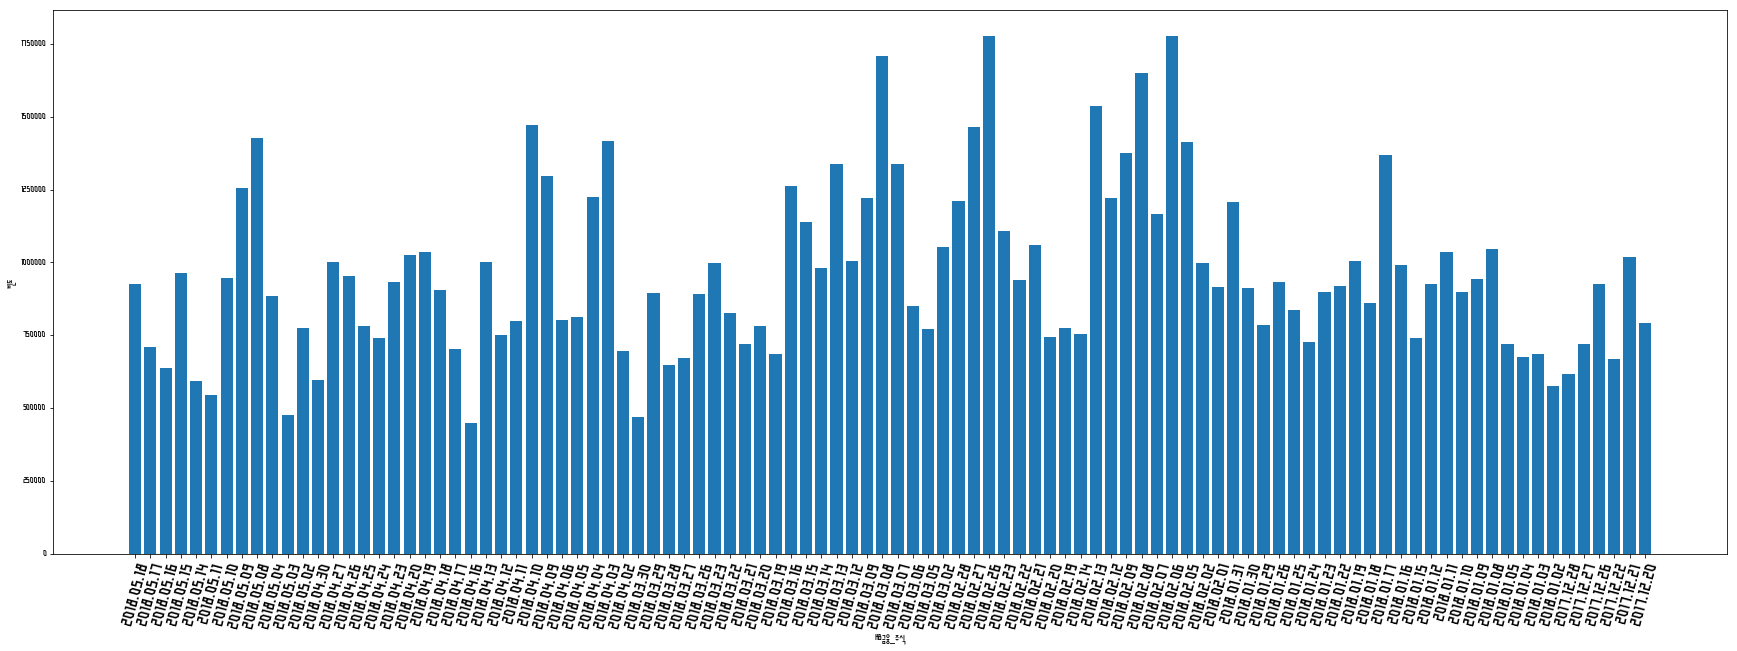

In [147]:
font_location="C:/Windows/Fonts/H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
sorted(KB_a.index,reverse=True)     
plt.bar(sorted(KB_a.index,reverse=False), KB_a["KB금융_수익"])
plt.xticks(sorted(KB_a.index,reverse=False), KB_a.index, rotation='75')
plt.xlabel('KB금융_주식') 
plt.ylabel('빈도') 
plt.show()
# KB금융 주식 그래프이다

In [149]:
plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
sorted(KB_a.index,reverse=True)     
plt.scatter(sorted(KB_a.index,reverse=False), KB_a["KB금융_수익"])
plt.xticks(sorted(KB_a.index,reverse=False), KB_a.index, rotation='75')
plt.xlabel('KB금융_수익 키워드') 
plt.ylabel('빈도') 
plt.show()
# KB금융으로 만든 그래프이다.(점방식) 

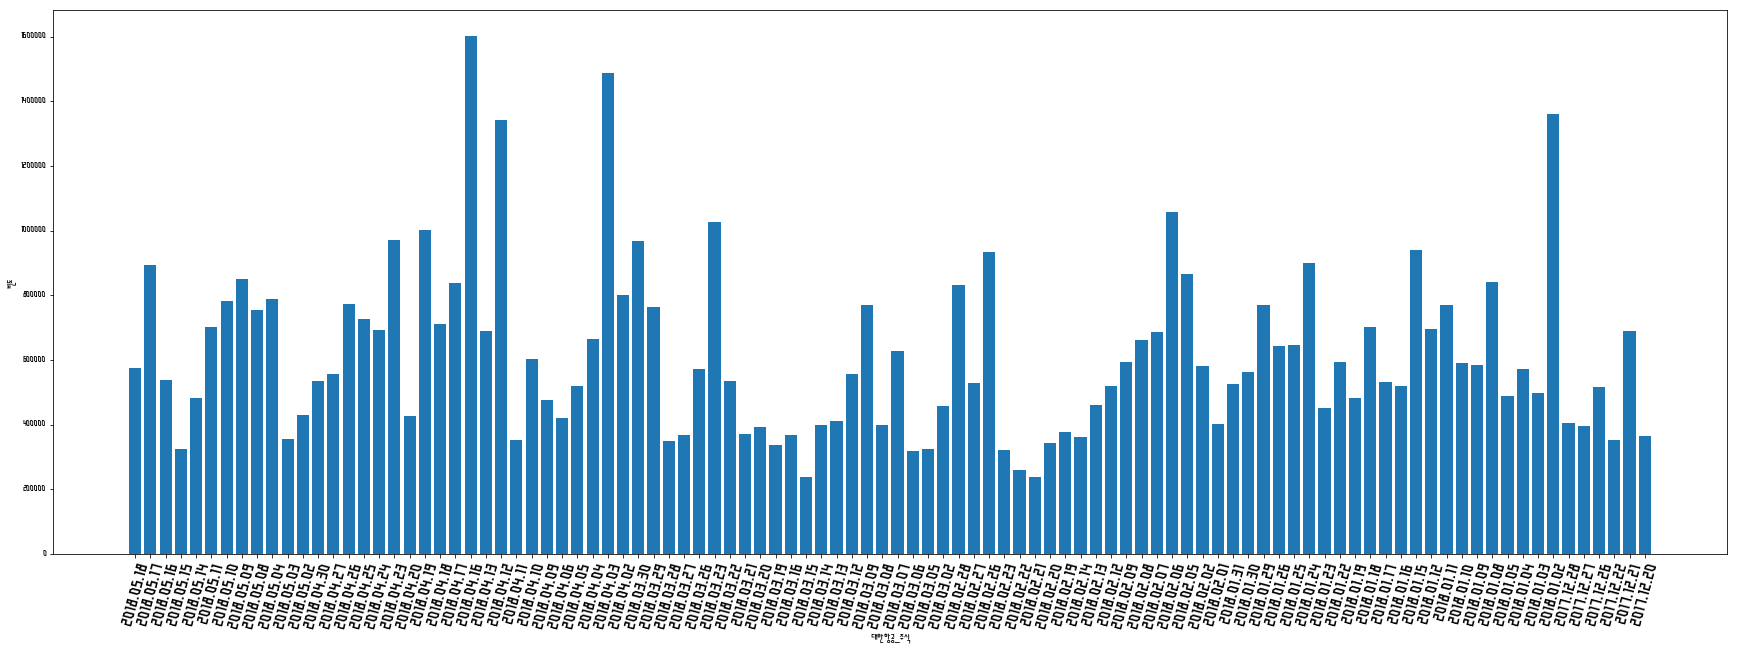

In [156]:
font_location="C:/Windows/Fonts/H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
sorted(Korea_a.index,reverse=True)     
plt.bar(sorted(Korea_a.index,reverse=False), Korea_a["대한항공_수익"])
plt.xticks(sorted(Korea_a.index,reverse=False), Korea_a.index, rotation='75')
plt.xlabel('대한항공_주식') 
plt.ylabel('빈도') 
plt.show()
# 대한 항공 주식 그래프이다.

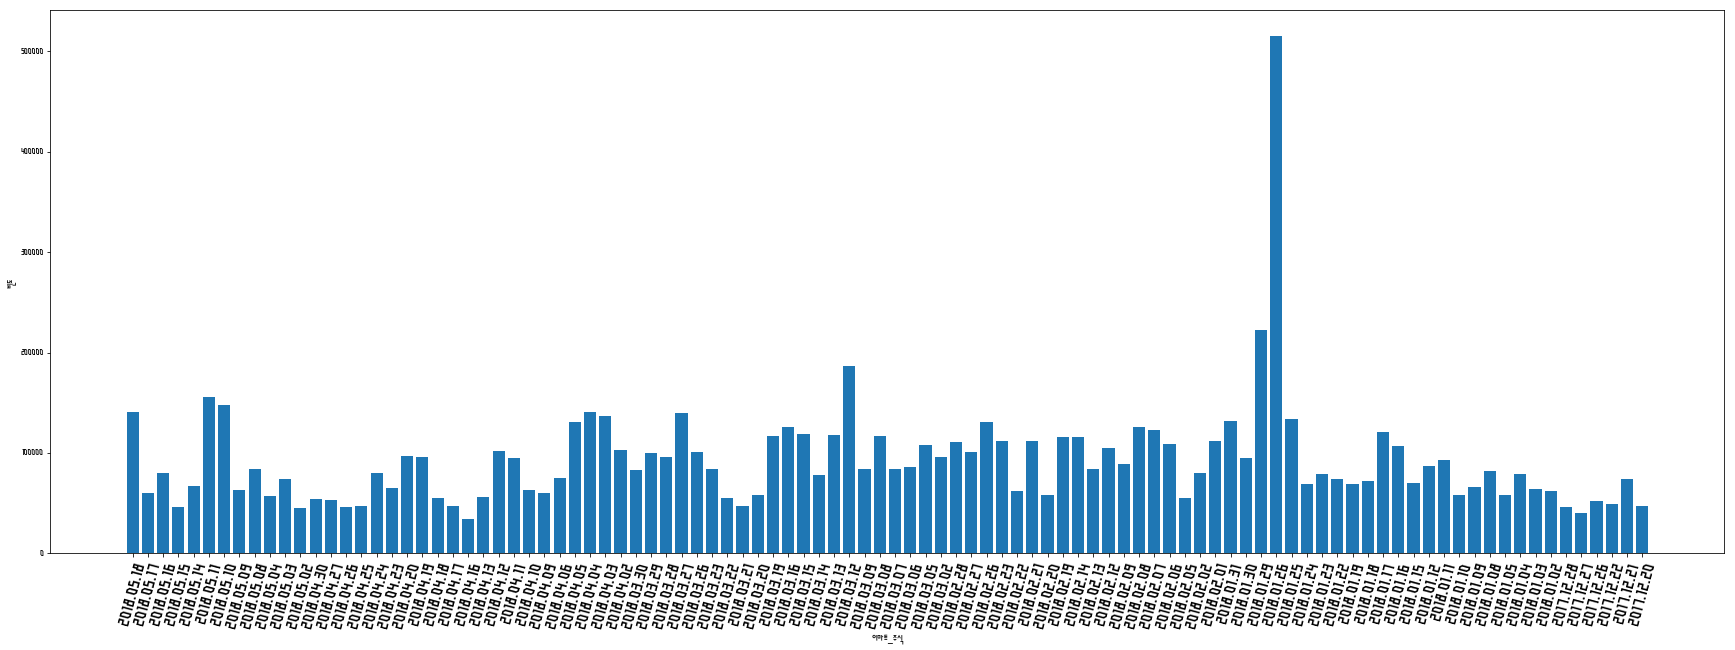

In [157]:
font_location="C:/Windows/Fonts/H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
sorted(Emart_a.index,reverse=True)     
plt.bar(sorted(Emart_a.index,reverse=False), Emart_a["이마트_수익"])
plt.xticks(sorted(Emart_a.index,reverse=False), Emart_a.index, rotation='75')
plt.xlabel('이마트_주식') 
plt.ylabel('빈도') 
plt.show()
# 이마트 주식 그래프이다.

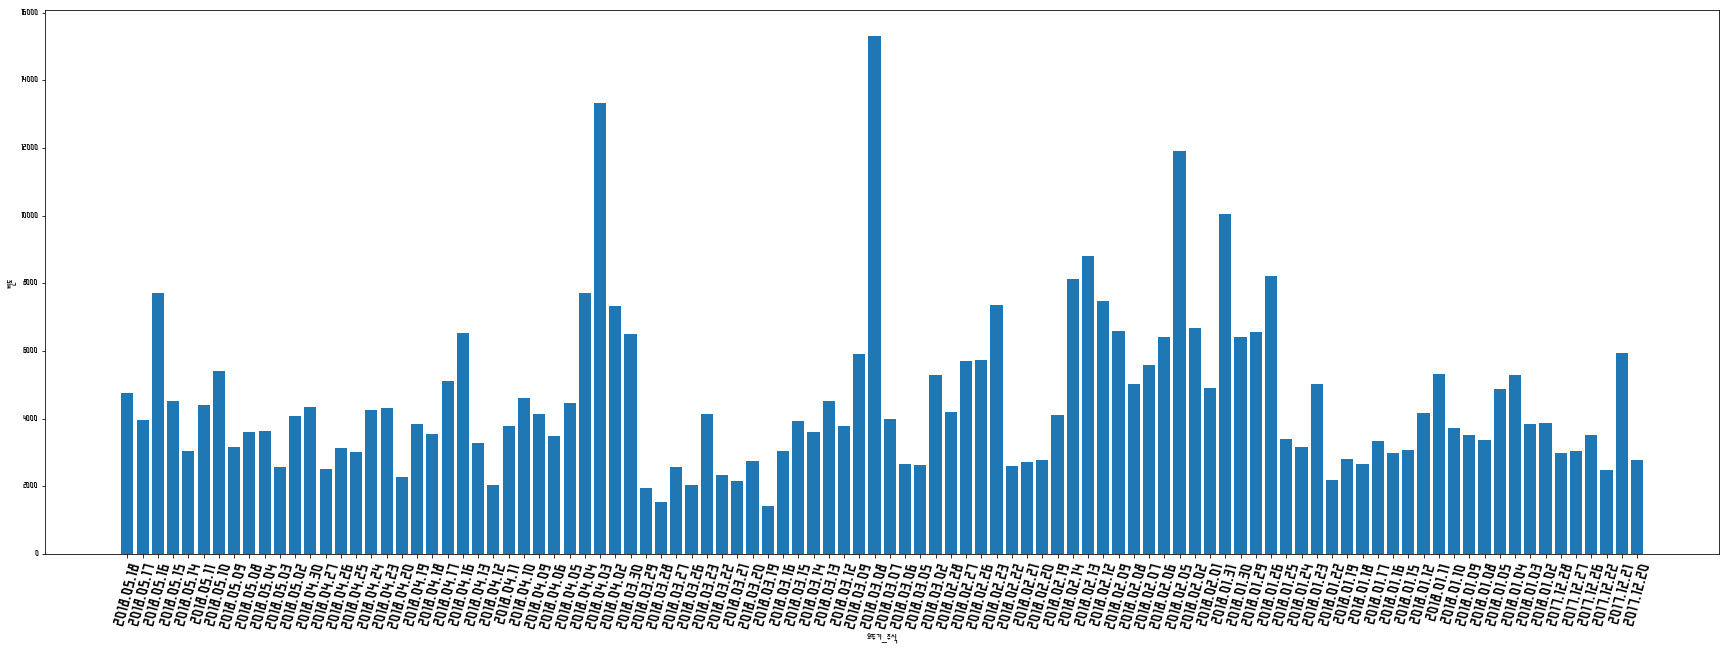

In [158]:
font_location="C:/Windows/Fonts/H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
sorted(Odogi_a.index,reverse=True)     
plt.bar(sorted(Odogi_a.index,reverse=False), Odogi_a["오뚜기_수익"])
plt.xticks(sorted(Odogi_a.index,reverse=False), Odogi_a.index, rotation='75')
plt.xlabel('오뚜기_주식') 
plt.ylabel('빈도') 
plt.show()
# 오뚜기 주식 그래프이다.

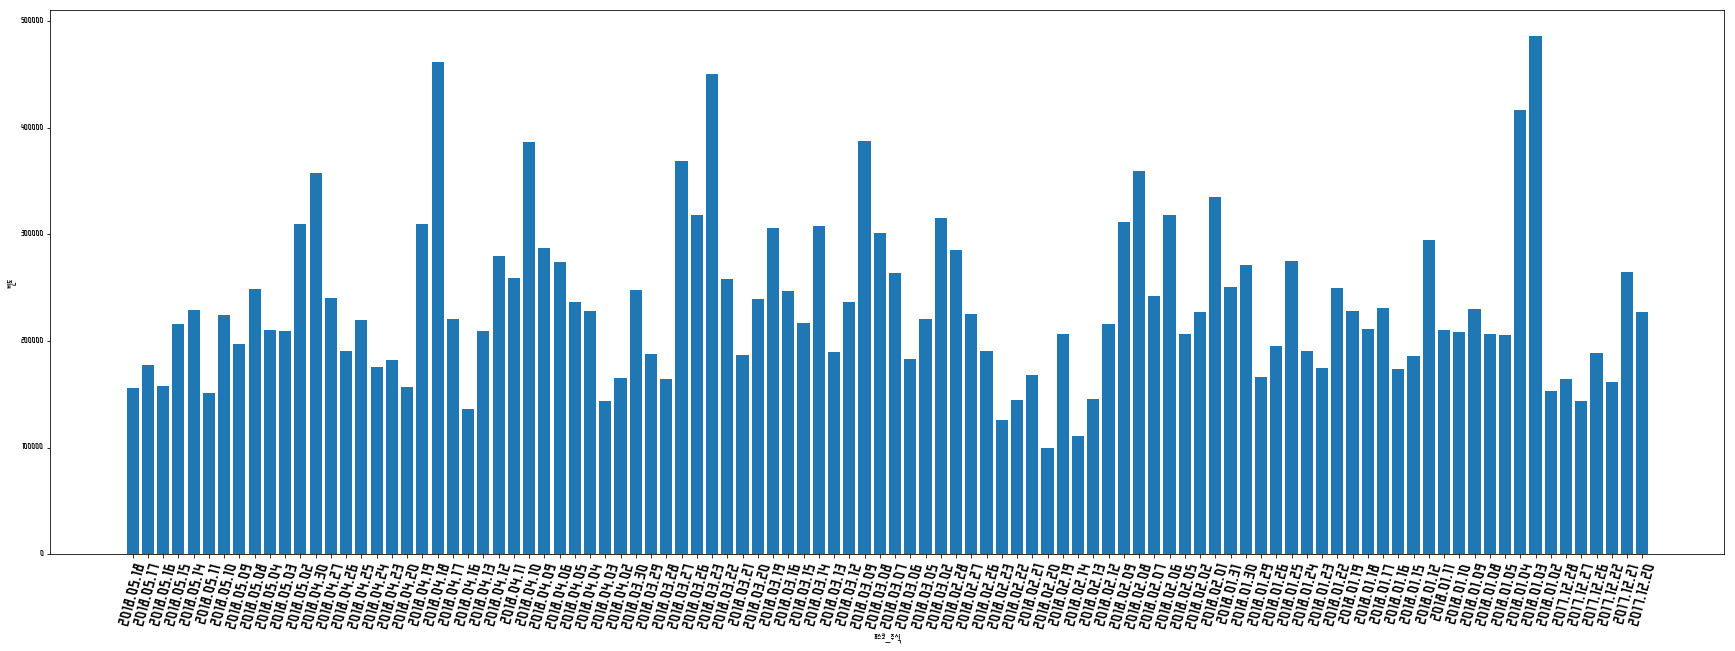

In [159]:
font_location="C:/Windows/Fonts/H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
sorted(posco_a.index,reverse=True)     
plt.bar(sorted(posco_a.index,reverse=False), posco_a["포스코_수익"])
plt.xticks(sorted(posco_a.index,reverse=False), posco_a.index, rotation='75')
plt.xlabel('포스코_주식') 
plt.ylabel('빈도') 
plt.show()
# 포스코 주식 그래프이다.

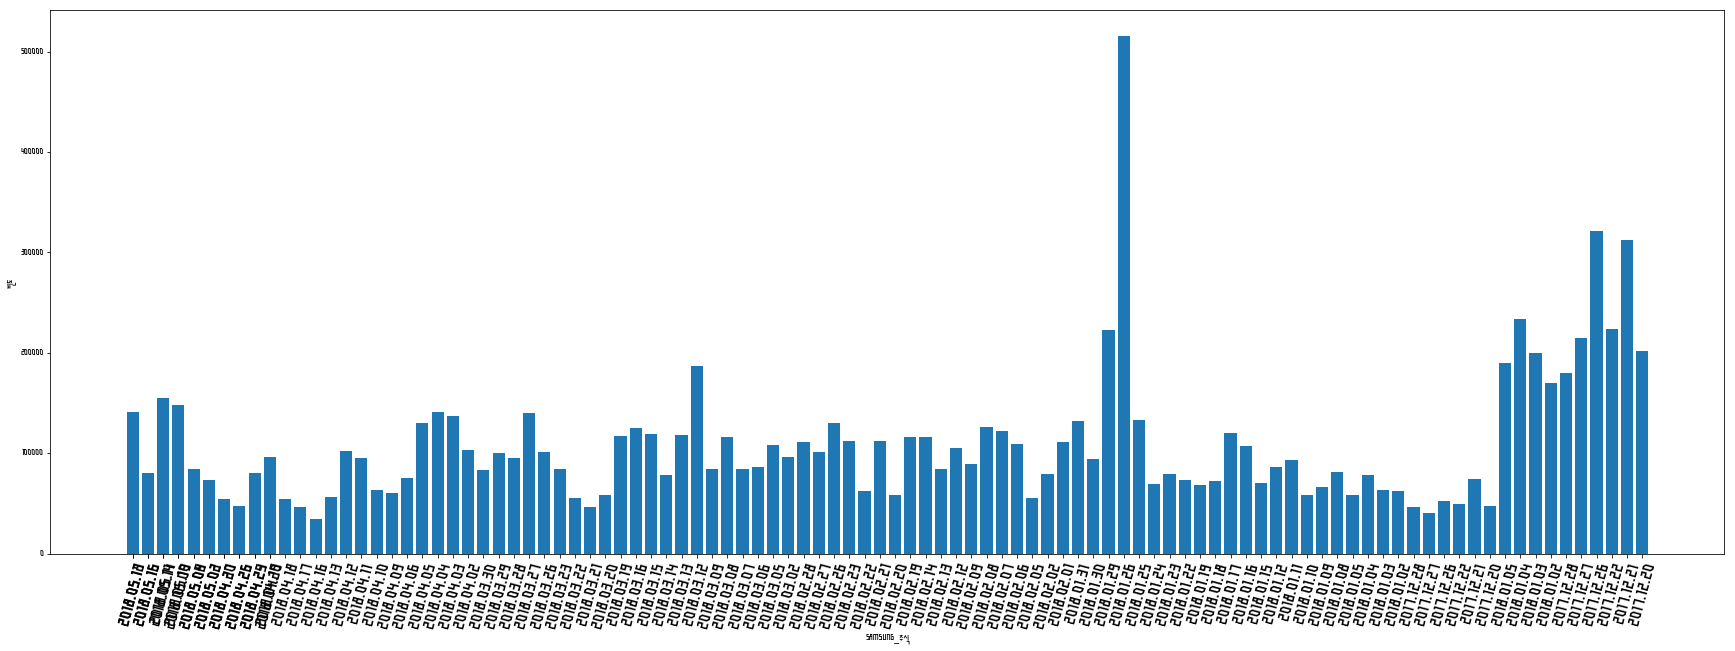

In [160]:
font_location="C:/Windows/Fonts/H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
sorted(Samsung_a.index,reverse=True)     
plt.bar(sorted(Samsung_a.index,reverse=False), Samsung_a["SAMSUNG_수익"])
plt.xticks(sorted(Samsung_a.index,reverse=False), Samsung_a.index, rotation='75')
plt.xlabel('SAMSUNG_주식') 
plt.ylabel('빈도') 
plt.show()
# 삼성 주식 그래프이다.

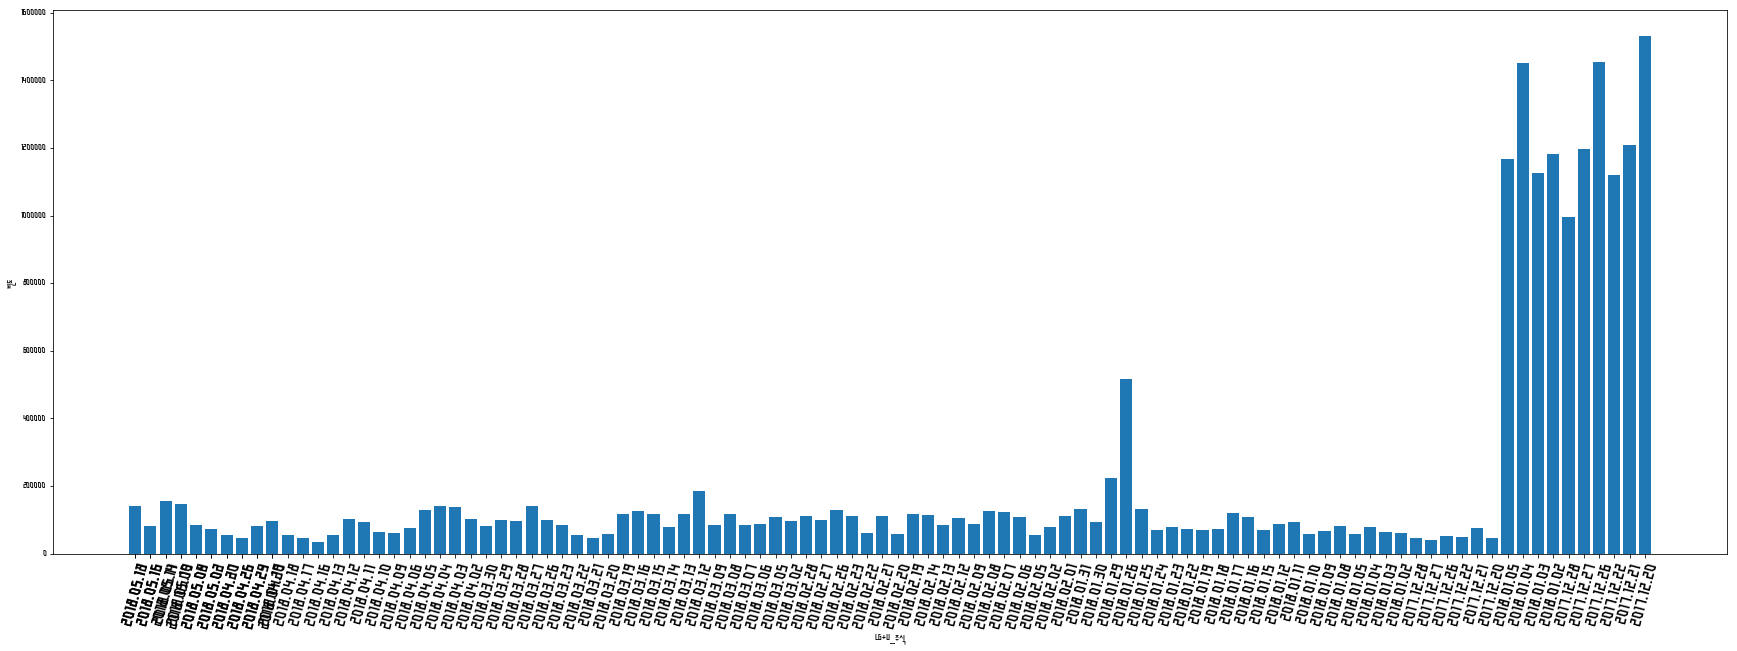

In [161]:
font_location="C:/Windows/Fonts/H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
sorted(LG_U_a.index,reverse=True)     
plt.bar(sorted(LG_U_a.index,reverse=False), LG_U_a["LG+U_수익"])
plt.xticks(sorted(LG_U_a.index,reverse=False), LG_U_a.index, rotation='75')
plt.xlabel('LG+U_주식') 
plt.ylabel('빈도') 
plt.show()
# LG주식 그래프이다.

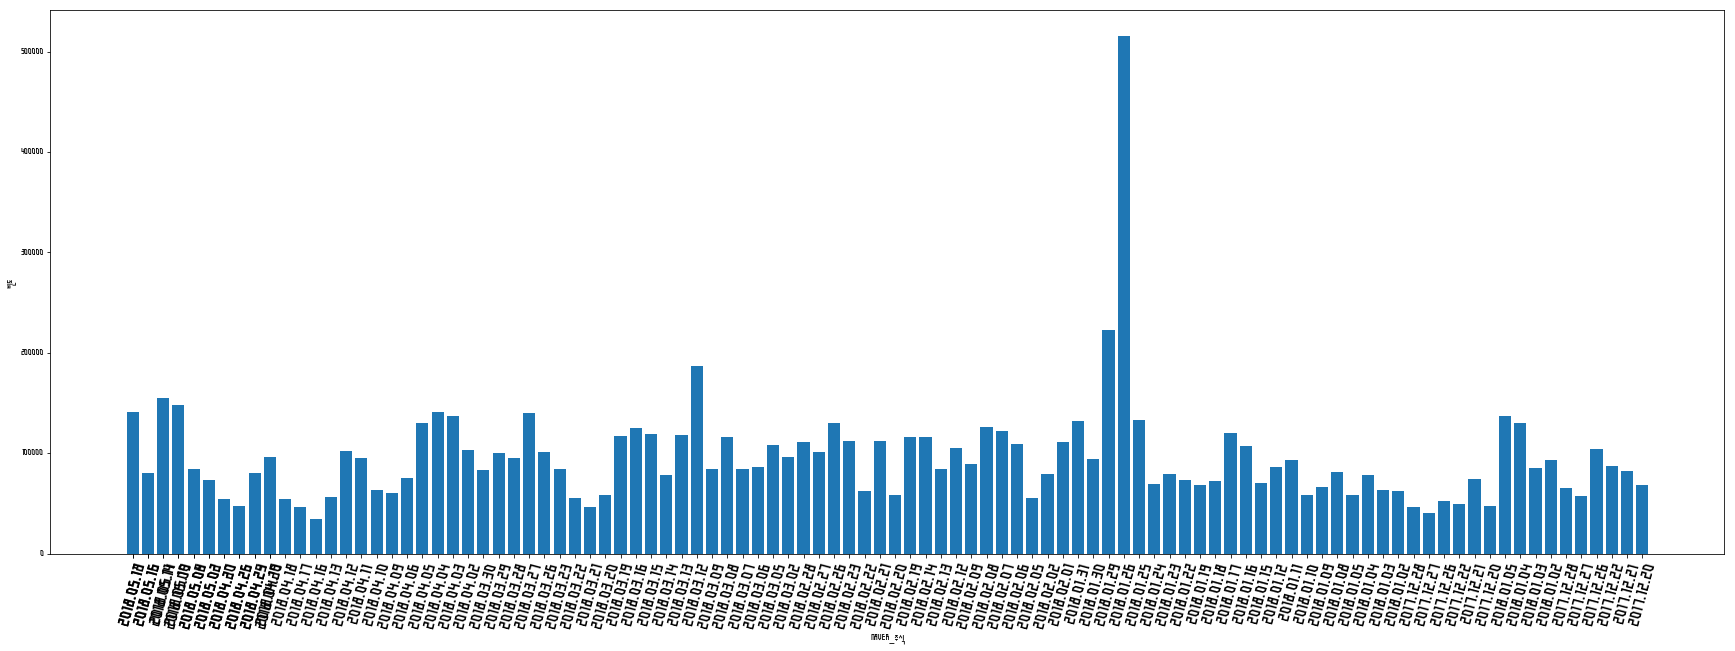

In [162]:
font_location="C:/Windows/Fonts/H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
sorted(Naver_a.index,reverse=True)     
plt.bar(sorted(Naver_a.index,reverse=False), Naver_a["NAVER_수익"])
plt.xticks(sorted(Naver_a.index,reverse=False), Naver_a.index, rotation='75')
plt.xlabel('NAVER_주식') 
plt.ylabel('빈도') 
plt.show()
# NAVER 주식 그래프이다.

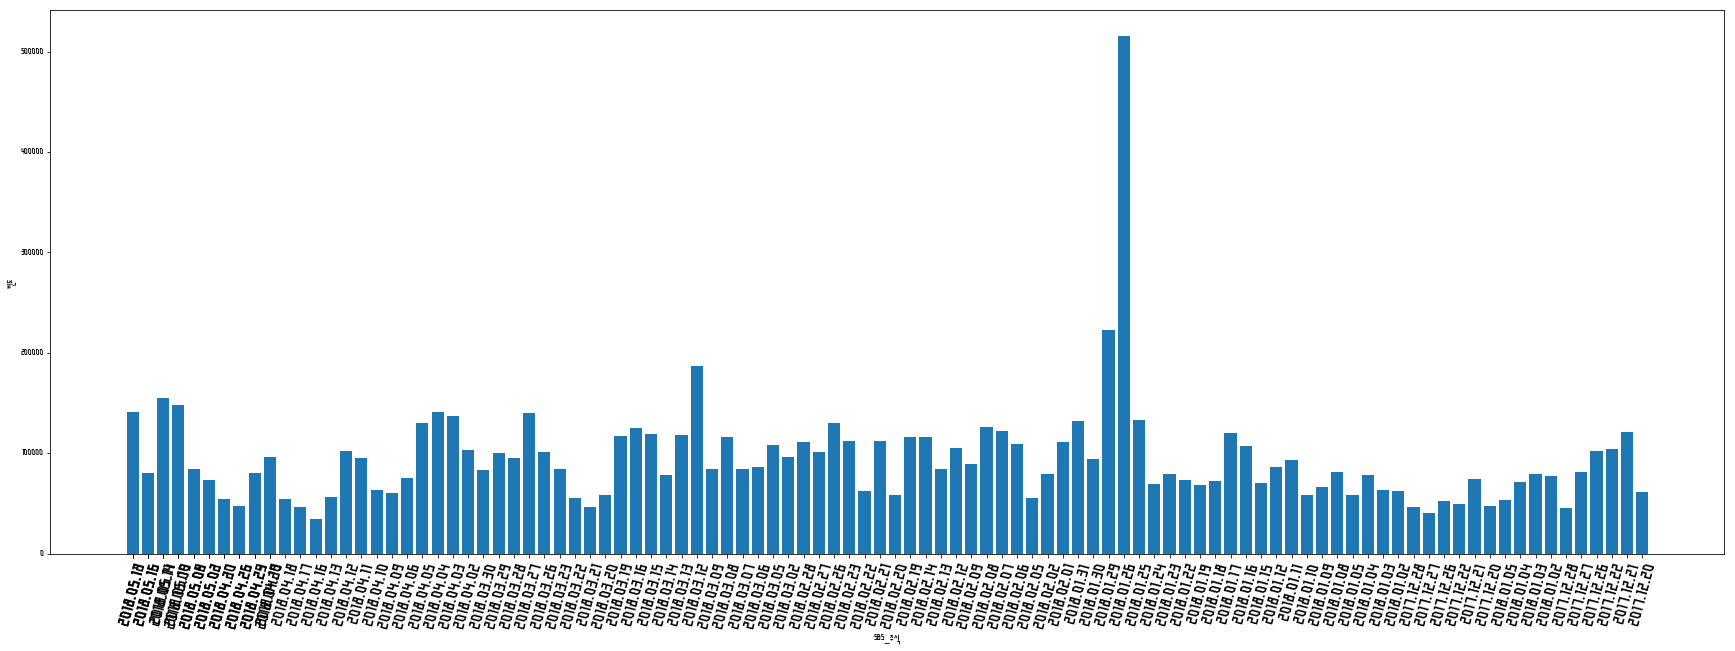

In [164]:
font_location="C:/Windows/Fonts/H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
sorted(SBS_a.index,reverse=True)     
plt.bar(sorted(SBS_a.index,reverse=False), SBS_a["SBS_수익"])
plt.xticks(sorted(SBS_a.index,reverse=False), SBS_a.index, rotation='75')
plt.xlabel('SBS_주식') 
plt.ylabel('빈도') 
plt.show()
# SBS 주식 그래프이다.

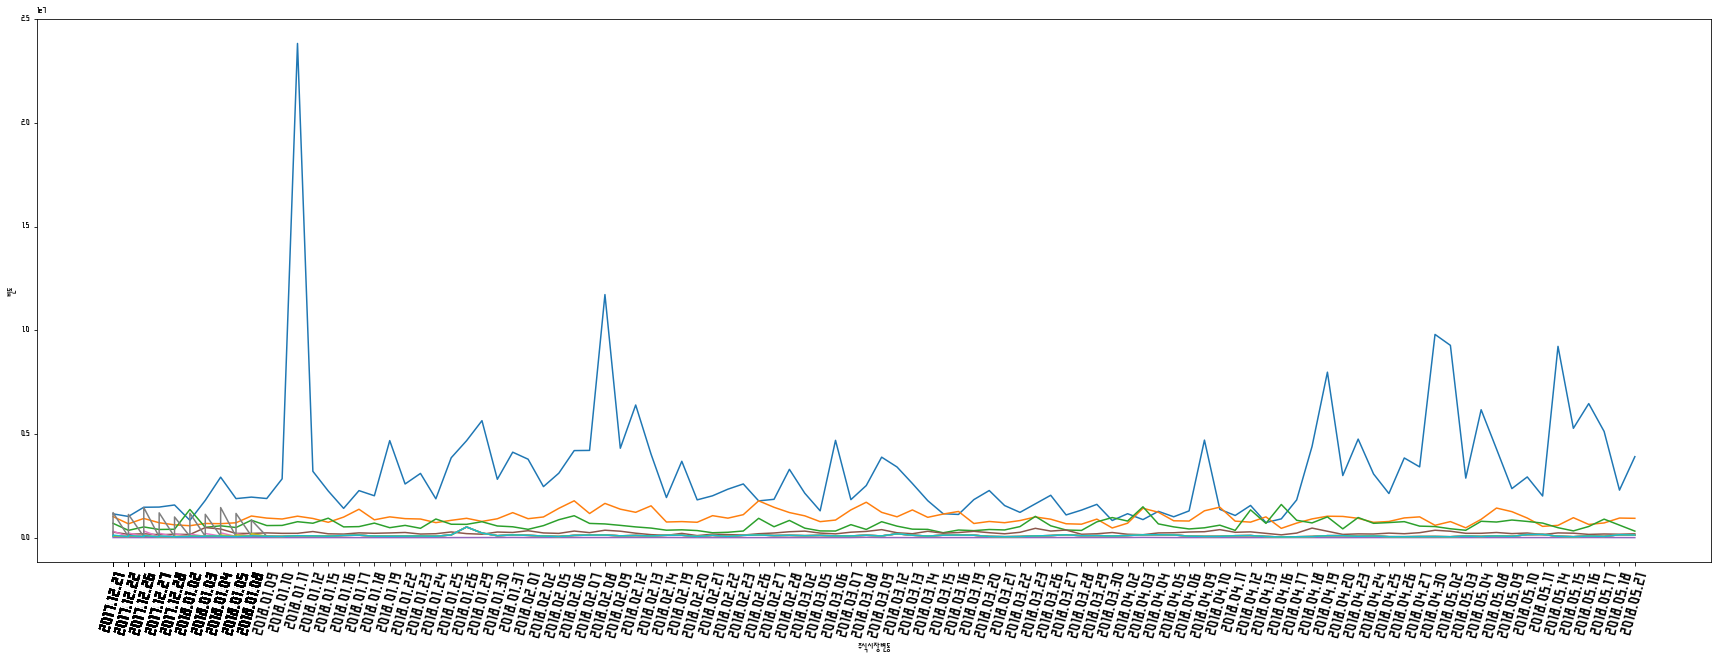

In [25]:
font_location="C:/Windows/Fonts/H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
sorted(Final.index,reverse=True)     
plt.plot(sorted(Final.index,reverse=False), Final["대우건설_수익"])
plt.plot(sorted(Final.index,reverse=False), Final["KB금융_수익"])
plt.plot(sorted(Final.index,reverse=False), Final["대한항공_수익"])
plt.plot(sorted(Final.index,reverse=False), Final["이마트_수익"])
plt.plot(sorted(Final.index,reverse=False), Final["오뚜기_수익"])
plt.plot(sorted(Final.index,reverse=False), Final["포스코_수익"])
plt.plot(sorted(Final.index,reverse=False), Final["SAMSUNG_수익"])
plt.plot(sorted(Final.index,reverse=False), Final["LG+U_수익"])
plt.plot(sorted(Final.index,reverse=False), Final["NAVER_수익"])
plt.plot(sorted(Final.index,reverse=False), Final["SBS_수익"])
plt.xticks(sorted(Final.index,reverse=False), Final.index, rotation='75')
plt.xlabel('주식시장변동') 
plt.ylabel('빈도') 
plt.show()
# 주식시장변동에 따른 빈도 그래프